## Alice spring: 2016, 2017, 2018 

In [1]:
#!jupyter nbextensions_configurator enable --user


In [2]:
#!pip install jupyter_contrib_nbextensions


In [3]:
from IPython.display import HTML, display
from sympy import diff, init_printing
import argparse
import csv
init_printing() 
init_printing(use_latex='mathjax')  # This causes mathjax to render all output
from sympy.printing import StrPrinter
StrPrinter._print_Quantity = lambda self, expr: str(expr.abbrev)    # displays short units (m instead of meter

In [4]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

!pip install statsmodels

In [5]:
from sys import stdout       # For printing progress of computations
import numpy as np
import pandas as pd
import scipy as sc
import glob
import statsmodels.api as sm
from io import StringIO
import matplotlib as mpl
import matplotlib.pyplot as plt
from sympy import *
from sklearn import metrics
import calendar
from sympy.printing.theanocode import theano_function

In [6]:
import numpy as np
from netCDF4 import Dataset
import netCDF4
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import sys
from itertools import chain



In [7]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [8]:
import xarray as xr
from sympy.physics.units import convert_to
#import matplotlib
#from matplotlib import rc
import numpy as np
from pandas import Timestamp
from essm import Eq, e
from essm.equations import Equation
from essm.variables import Variable
from essm.variables.utils import generate_metadata_table
from essm.variables.units import derive_unit, derive_baseunit, markdown, SI
from essm.variables.units import joule, kelvin, kilogram, meter, pascal, second, watt

from sympy import diff, Eq, exp, init_printing, log, solve, sqrt 

In [9]:
import glob
from netCDF4 import Dataset
import os

filelist = ['arr[0]', 'arr[1]', 'arr[2]']
ncfile = xr.open_mfdataset(filelist)

In [10]:
!ls /home/gitanjalithakur/Documents/Aerodynamic_conductance/essm/aerodynamic_conductances/jupyter/LST_epsilon/data/T

ls: cannot access '/home/gitanjalithakur/Documents/Aerodynamic_conductance/essm/aerodynamic_conductances/jupyter/LST_epsilon/data/T': No such file or directory


In [11]:
path = '/home/thakur_21505/Documents/git_projects/aerodynamic_conductances/jupyter/leonardo_conference/data/AS' 
#print(path)
    
ncfile = xr.open_mfdataset(path +'/*.nc') #, concat_dim= 'ensemble')


/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  after removing the cwd from sys.path.
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/backends/api.py:941: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).The datasets supplied require both concatenation and merging. From
xarray v

In [12]:
HWframe= ncfile.to_dataframe()


In [13]:
HWframe.index=HWframe.index.set_names(['longitute','latitute','time'])#'latitute', 'longitute'

In [14]:
HWframe.reset_index(inplace=True)
HWframe.index=HWframe.time

HWframerang = pd.date_range('1/1/2016 00:00:00', periods=len(HWframe.index), freq='30min')
HWframe.index = HWframerang
HWframe

In [15]:
plt_path= '/home/thakur_21505/lst-retrival-from-fluxnet-data/latex/plots_lstpaper/'

### prec:

In [16]:
df_prec=HWframe[['Precip']]
df_prec1=df_prec.resample('D').sum()
#df_prec1

### data in pandas series

In [17]:
airtemp = HWframe['Ta']


In [18]:
HWframe=HWframe.replace(-9999.000000, np.nan)

## combining series:
HWframe=pd.concat([SH2, lup2, lud2, TA2, Rn2, WS2], axis=1)
HWframe.head()
HWframe=HWframe.replace(-9999.000000, np.nan)
HWframe.fh



### Longwave balance:

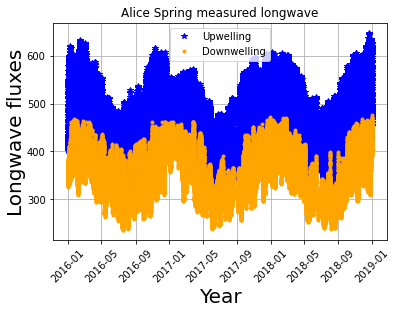

In [19]:
df=HWframe.copy()
plt.plot(df.index,df.Flu,"*",color= 'blue')
plt.plot(df.index,df.Fld, ".",color= 'orange')
plt.xticks(rotation=45)
plt.xlabel('Year', ha='center',fontsize=20)
plt.ylabel('Longwave fluxes', labelpad=10, va='center',fontsize=20)
plt.legend(['Upwelling','Downwelling'])
plottitle = 'Alice Spring measured longwave'
fname = 'Alice spring longw'
plt.title(plottitle)
plt.grid()
plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')
####

## SEB correction

In [20]:
Beta = (HWframe.Fh)/(HWframe.Fe)
HWframe["beta"] = Beta

dLE=(HWframe.Fn - HWframe.Fg - (1+ HWframe.beta)*HWframe.Fe)/(1+ HWframe.beta)
HWframe["dLE"] = dLE
HWframe["Fe_corr"] = HWframe.dLE + HWframe.Fe
HWframe["dH"] = (HWframe.dLE + HWframe.Fe)* Beta - HWframe.Fh
HWframe["Fh_corr"] = HWframe.Fh + HWframe.dH

#dH=

## variables :

In [21]:
class epsilon (Variable):
    """emissivity """ 
    unit = 1 
    latex_name ='\epsilon'
    #default = 0.9
class eps_r (Variable):
    """emissivity from """ 
    unit = 1 
    latex_name ='\epsilon_{r}'
    #default = 0.9
class eps_b (Variable):
    """emissivity from """ 
    unit = 1 
    latex_name ='\epsilon_{b}'
    #default = 0.9
        
    
    
class sigma (Variable):
    """ stefan-boltzmann constant""" 
    unit =  watt/(meter**2 * kelvin**4)
    latex_name ='\sigma'
    default = 5.67 * 10**-8


class T_s(Variable): 
    """Effective surface temperature.""" 
    unit = kelvin 
    latex_name ='T_{s}'
       
    
class T_a(Variable): 
    """Air temperature""" 
    unit = kelvin 
    latex_name ='T_a'   
 
    
class R_lout(Variable): 
    """upwelling longwave""" 
    unit = watt/meter**2
    latex_name ='R_{l,out}'
    #default = Hs.longwave_up
    
    
class H(Variable): 
    """sensible heat""" 
    unit = watt/meter**2
    latex_name ='H'
    
class delta_T(Variable): 
    """difference in surface and air temperature""" 
    unit = kelvin 
    latex_name ='\Delta T'

    

In [22]:
# calculation of Ts considering both eitted and reflected radiation(Mike)
class R_lin(Variable):
    """Incoming Longwave radiation"""
    latex_name = r'R_{l,in}'
    unit = watt/meter**2
class eq_Rlout_Rlin(Equation):
    """Upwelling longwave radiation including reflected."""
    expr = Eq(R_lout, sigma*epsilon*T_s**4 + (1-epsilon) * R_lin)
eq_Rlout_Rlin

                          4    
Rₗₒᵤₜ = Rₗᵢₙ⋅(-ε + 1) + Tₛ ⋅ε⋅σ

In [23]:
class eq_Ts_Rlout_Rlin(eq_Rlout_Rlin.definition):
    """Surface temperature as a function of LWout and LWin"""
    soln = solve(eq_Rlout_Rlin, T_s, dict=True)
    expr = Eq(T_s, soln[1][T_s])
eq_Ts_Rlout_Rlin

         _____________________
        ╱ Rₗᵢₙ   Rₗᵢₙ   Rₗₒᵤₜ 
Tₛ = 4 ╱  ──── - ──── + ───── 
     ╲╱    σ     ε⋅σ     ε⋅σ  

In [24]:
class eq_Ts_Rlout_Rlin(eq_Rlout_Rlin.definition):
    """Surface temperature as a function of LWout and LWin"""
    soln = solve(eq_Rlout_Rlin, T_s, dict=True)
    expr = Eq(T_s, soln[1][T_s])
eq_Ts_Rlout_Rlin

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/essm/equations/_core.py:107: UserWarning: "__main__:eq_Ts_Rlout_Rlin" will be overridden by "__main__:<class '__main__.eq_Ts_Rlout_Rlin'>"
  instance[expr] = instance


         _____________________
        ╱ Rₗᵢₙ   Rₗᵢₙ   Rₗₒᵤₜ 
Tₛ = 4 ╱  ──── - ──── + ───── 
     ╲╱    σ     ε⋅σ     ε⋅σ  

In [25]:
HWframe["T_a"] = pd.Series(HWframe.Ta + 273.15, index=HWframe.index)

tf_Ts = theano_function([R_lin, R_lout], [eq_Ts_Rlout_Rlin.rhs.subs(Variable.__defaults__)], dims={R_lin:1, R_lout:1})
list_Ts = tf_Ts(HWframe.Flu,HWframe.Fld)
print(list_Ts)


## surface temperature calculation: ignoring reflected / SBlaw

In [26]:
class eq_Rlout(Equation):
    """Upwelling longwave radiation."""
    expr = Eq(R_lout, sigma*epsilon*T_s**4)
eq_Rlout


          4    
Rₗₒᵤₜ = Tₛ ⋅ε⋅σ

In [27]:
class eq_Ts_Rlout(eq_Rlout.definition):
    """Surface temperature as a function of LWout"""
    soln = solve(eq_Rlout, T_s, dict=True)
    expr = Eq(T_s, soln[1][T_s])
eq_Ts_Rlout

         _______
        ╱ Rₗₒᵤₜ 
Tₛ = 4 ╱  ───── 
     ╲╱    ε⋅σ  

## plots:

In [28]:
def Ts_boxplt_modeps (df_all,year):    #days,hours):
    """Plot a panel per month with H and delT."""
    #df_all = Asframe.copy()
    con_month=[]
    ign_month=[]
    for i in range(12):
        list_months = list(range(1,13))
        df = df_all[(df_all.index.year == year) & (df_all.index.month == list_months[i]) &  (df_all.Fn > 25) & (df_all.Ws > 2) ]  
                    #& (df_all.NETRAD > 25) & (df_all.WS > 2)]
                    #& (df_all.index.day == days) & (df_all.index.hour== hours) & (df_all.index.minute == 0)] 
        epsilon1=0.97
        epsilon_mod=0.97
        #epsion2=0.827
        #ign_rad=[]
        #con_rad=[]
        
        
        ign_rad=[]
        con_rad=[]
            
            
        tf_T_s1 = theano_function([R_lout], [eq_Ts_Rlout.rhs.subs(epsilon, epsilon1).
                                                          subs(Variable.__defaults__)], dims={R_lout:1})
                                                       
            
        list_T_s1 = tf_T_s1(df.Flu)
        df = df.assign(T_s1=list_T_s1)
            #####
        tf_T_s = theano_function([R_lin, R_lout], [eq_Ts_Rlout_Rlin.rhs.subs(epsilon, epsilon1).
                                                          subs(Variable.__defaults__)], dims={R_lin:1, R_lout:1})
                                                       
        list_T_s = tf_T_s(df.Fld,df.Flu)
        df = df.assign(T_s=list_T_s)
        
        ign_rad.append(df.T_s1)
        con_rad.append(df.T_s)
            
            #my_con1=np.ravel(con_rad)
            #print(len(my_con1))
        my_con2=np.ravel(con_rad)
        my_ign2=np.ravel(ign_rad)
        
            #monthsdata= pd.DataFrame(columns=["months", "Ts"])
        con_month.append(my_con2)
        ign_month.append(my_ign2)
       
       
    box=plt.boxplot([con_month[0],con_month[1],con_month[2],con_month[3],con_month[4],con_month[5],
             con_month[6],con_month[7],con_month[8],con_month[9],con_month[10],con_month[11]],1,patch_artist=True,
               positions=np.arange(0.75,12.75))
    box1=plt.boxplot([ign_month[0],ign_month[1],ign_month[2],ign_month[3],ign_month[4],ign_month[5],
             ign_month[6],ign_month[7],ign_month[8],ign_month[9],ign_month[10],ign_month[11]],1,patch_artist=True,
                 positions=np.arange(1.25,13.25))
    plt.setp(box1["boxes"], facecolor='orange')
    plt.setp(box["boxes"], facecolor='blue')
    plt.ylim(273, 335)
    plt.xticks(np.arange(1,13), ('0','1','2','3','4','5','6','7','8','9','10','11','12'))
    plt.ylabel('Temperature (K)', ha='center',fontsize=20)
    plt.xlabel('Month', labelpad=10, va='center',fontsize=20)
   
    #plt.ylim(min(y), max(y))
    plt.legend([box["boxes"][0],box1["boxes"][0]],["considering relected component", "ignoring relected component"],loc="upper left")         
    plt.title('{0},$\epsilon_mod$={1}'.format(df.index[0].date().strftime('%Y'), 
                                               str(np.round(epsilon_mod,decimals=3))))
                                               
                                                #str(np.round(epsilon2,decimals=3))))
    plt.grid()
    plt.show()

   
    

### Ts and TS1 box plot for eps range:

### for modis eps

In [29]:
class epsilon_mod (Variable):
    """emissivity """ 
    unit = 1 
    latex_name ='\epsilon_{modis}'
    #default = 0.9

In [30]:
#generate_metadata_table([])

In [31]:
def Ts_boxplt_modeps (df_all,year):    #days,hours):
    """Plot a panel per month with H and delT."""
    #df_all = Asframe.copy()
    con_month=[]
    ign_month=[]
    for i in range(12):
        list_months = list(range(1,13))
        df = df_all[(df_all.index.year == year) & (df_all.index.month == list_months[i]) &  (df_all.Fn > 25) & (df_all.Ws > 2) ]  
                    #& (df_all.NETRAD > 25) & (df_all.WS > 2)]
                    #& (df_all.index.day == days) & (df_all.index.hour== hours) & (df_all.index.minute == 0)] 
        epsilon1=0.97
        epsilon_mod=0.97
        #epsion2=0.827
        #ign_rad=[]
        #con_rad=[]
        
        
        ign_rad=[]
        con_rad=[]
            
            
        tf_T_s1 = theano_function([R_lout], [eq_Ts_Rlout.rhs.subs(epsilon, epsilon1).
                                                          subs(Variable.__defaults__)], dims={R_lout:1})
                                                       
            
        list_T_s1 = tf_T_s1(df.Flu)
        df = df.assign(T_s1=list_T_s1)
            #####
        tf_T_s = theano_function([R_lin, R_lout], [eq_Ts_Rlout_Rlin.rhs.subs(epsilon, epsilon1).
                                                          subs(Variable.__defaults__)], dims={R_lin:1, R_lout:1})
                                                       
        list_T_s = tf_T_s(df.Fld,df.Flu)
        df = df.assign(T_s=list_T_s)
        
        ign_rad.append(df.T_s1)
        con_rad.append(df.T_s)
            
            #my_con1=np.ravel(con_rad)
            #print(len(my_con1))
        my_con2=np.ravel(con_rad)
        my_ign2=np.ravel(ign_rad)
        
            #monthsdata= pd.DataFrame(columns=["months", "Ts"])
        con_month.append(my_con2)
        ign_month.append(my_ign2)
       
       
    box=plt.boxplot([con_month[0],con_month[1],con_month[2],con_month[3],con_month[4],con_month[5],
             con_month[6],con_month[7],con_month[8],con_month[9],con_month[10],con_month[11]],1,patch_artist=True,
               positions=np.arange(0.75,12.75))
    box1=plt.boxplot([ign_month[0],ign_month[1],ign_month[2],ign_month[3],ign_month[4],ign_month[5],
             ign_month[6],ign_month[7],ign_month[8],ign_month[9],ign_month[10],ign_month[11]],1,patch_artist=True,
                 positions=np.arange(1.25,13.25))
    plt.setp(box1["boxes"], facecolor='orange')
    plt.setp(box["boxes"], facecolor='blue')
    plt.ylim(273, 335)
    plt.xticks(np.arange(1,13), ('0','1','2','3','4','5','6','7','8','9','10','11','12'))
    plt.ylabel('Temperature (K)', ha='center',fontsize=20)
    plt.xlabel('Month', labelpad=10, va='center',fontsize=20)
   
    #plt.ylim(min(y), max(y))
    plt.legend([box["boxes"][0],box1["boxes"][0]],["considering relected component", "ignoring relected component"],loc="upper left")         
    plt.title('{0},$\epsilon_mod$={1}'.format(df.index[0].date().strftime('%Y'), 
                                               str(np.round(epsilon_mod,decimals=3))))
                                               
                                                #str(np.round(epsilon2,decimals=3))))
    plt.grid()
    plt.show()

   
    

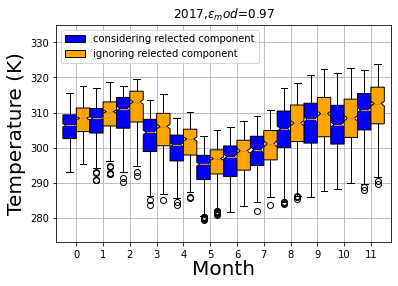

In [32]:
Ts_boxplt_modeps(HWframe,2017)

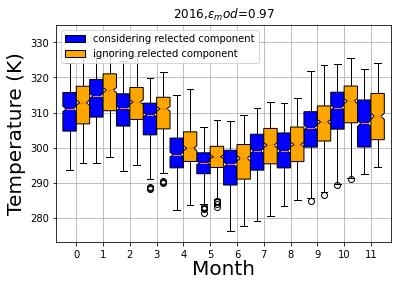

In [33]:
Ts_boxplt_modeps(HWframe,2016)

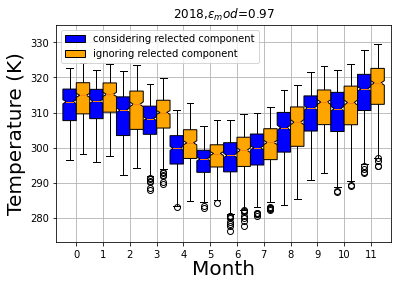

In [34]:
Ts_boxplt_modeps(HWframe,2018)

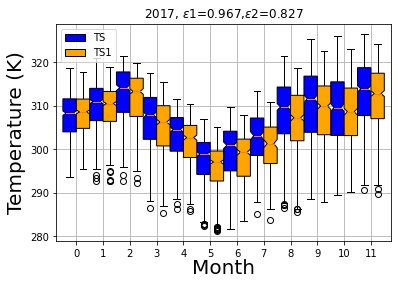

In [35]:
(df_all,year) = (HWframe,2017)
con_month=[]
ign_month=[]
for i in range(12):
    list_months = list(range(1,13))
    df = df_all[(df_all.index.year == year) & (df_all.index.month == list_months[i]) &  (df_all.Fn > 25) & (df_all.Ws > 2) ]  
                #& (df_all.NETRAD > 25) & (df_all.WS > 2)]
                #& (df_all.index.day == days) & (df_all.index.hour== hours) & (df_all.index.minute == 0)] 
    epsilon1=0.967
    epsilon2=0.827


    ign_rad=[]
    con_rad=[]


    tf_T_s1 = theano_function([R_lout], [eq_Ts_Rlout.rhs.subs(epsilon, epsilon1).
                                                      subs(Variable.__defaults__)], dims={R_lout:1})


    list_T_s1 = tf_T_s1(df.Flu)
    df = df.assign(T_s1=list_T_s1)
        #####
    tf_T_s = theano_function([R_lin, R_lout], [eq_Ts_Rlout_Rlin.rhs.subs(epsilon, epsilon2).
                                                      subs(Variable.__defaults__)], dims={R_lin:1, R_lout:1})

    list_T_s = tf_T_s(df.Fld,df.Flu)
    df = df.assign(T_s=list_T_s)

    ign_rad.append(df.T_s1)
    con_rad.append(df.T_s)
    my_con2=np.ravel(con_rad)
    my_ign2=np.ravel(ign_rad)

    con_month.append(my_con2)
    ign_month.append(my_ign2)


box=plt.boxplot([con_month[0],con_month[1],con_month[2],con_month[3],con_month[4],con_month[5],
             con_month[6],con_month[7],con_month[8],con_month[9],con_month[10],con_month[11]],1,patch_artist=True,
               positions=np.arange(0.75,12.75))


box1=plt.boxplot([ign_month[0],ign_month[1],ign_month[2],ign_month[3],ign_month[4],ign_month[5],
             ign_month[6],ign_month[7],ign_month[8],ign_month[9],ign_month[10],ign_month[11]],1,patch_artist=True,
                 positions=np.arange(1.25,13.25))
plt.setp(box1["boxes"], facecolor='orange')
plt.setp(box["boxes"], facecolor='blue')
plt.xticks(np.arange(1,13), ('0','1','2','3','4','5','6','7','8','9','10','11','12'))
plt.ylabel('Temperature (K)', ha='center',fontsize=20)
plt.xlabel('Month', labelpad=10, va='center',fontsize=20)
plt.legend([box["boxes"][0],box1["boxes"][0]],["TS", "TS1"],loc="upper left")         
plt.title('{0}, $\epsilon1$={1},$\epsilon2$={2}'.format(df.index[0].date().strftime('%Y'), 
                                               str(np.round(epsilon1,decimals=3)),
                                                str(np.round(epsilon2,decimals=3))))
plt.grid()
plt.show()



## opt eps using OLS: considering reflected

plt_path= '/home/gitanjalithakur/Documents/Aerodynamic_conductance/essm/aerodynamic_conductances/jupyter/LST_epsilon/plots/'

In [36]:
opteps_As_ref = pd.DataFrame(columns=["RMSE", "m","eps_ref","R2"])
def opteps_OLS_loop (years, df_all,mnth,xcol = 'DT', ycol = 'Fh', 
                     eqdigits=3, epsmin=0.7, epsmax=0.999, epsincr=0.002):
    
    k=0
    epsilon1=np.arange(epsmin, epsmax, epsincr).tolist() # using array of the epsilon values
    df = df_all[(df_all.index.year == years)& (df_all.index.month == mnth)  & (df_all.Fn > 25) & (df_all.Ws > 2)
         &(df_all.Fld_QCFlag==00)&(df_all.Flu_QCFlag==00)
                &(df_all.Ta_QCFlag==00)&(df_all.Fh_QCFlag==00)]
    
    for j in range(len(epsilon1)) :
        tf_T_s = theano_function([R_lin, R_lout], [eq_Ts_Rlout_Rlin.rhs.subs(epsilon, epsilon1[j]).
                                                          subs(Variable.__defaults__)], dims={R_lin:1, R_lout:1})
                                                       
        
       
        
        list_T_s = tf_T_s((df.Fld+5),(df.Flu+5)) # both longwave are overestimated by 5 watt/m2
        
        df = df.assign(T_s=list_T_s)
        #ycol = (df.Fh +30  )
        list_DT = df.T_s - df.T_a
        df = df.assign(DT=(df.T_s - df.T_a))
        ####
       
        #####
        df1 = df.dropna(subset=[xcol, ycol]) # for removing nan values
        xdata1 = df1[xcol]
        ydata1 = df1[ycol]
        x=np.array(xdata1)
        y=np.array(ydata1)
        x=x.reshape(-1,1)
        y=(y.reshape(-1,1) - 30) # sensible heat is overestimated by 30 watt/m2
        reg=LinearRegression(fit_intercept=False).fit(x, y) ## 2d x
        m=float(reg.coef_)
        y_pred = m*x
        N=len(y)
        MSE= mean_squared_error(y,y_pred)
        RMSE=float(sqrt(MSE))
        r2=r2_score(y,y_pred)
        if r2 > 0.5:
            opteps_As_ref.loc[k]=[RMSE, m, epsilon1[j], r2]
        else:
            opteps_As_ref.loc[k]=[np.nan, np.nan, 1, r2]
        k=k+1
        
    
    df_eps_ref=opteps_As_ref.copy()
    
    df_eps_ref.sort_values(by=['RMSE'],ascending=True,inplace=True)
   
    return df_eps_ref.eps_ref.iloc[0]
        

In [37]:
opteps_OLS_loop (2016, HWframe,6)

0.9140000000000001

### opt eps plot

In [38]:
def opteps_OLS_months2 (years, df,mnth,epsilon1,xcol = 'DT', ycol = 'Fh', eqdigits=3,):
    
    df_all = HWframe.copy()
     # using array of the epsilon values
    df = df_all[(df_all.index.year == years)& (df_all.index.month == mnth)  & (df_all.Fn > 25) & (df_all.Ws > 2)
        &(df_all.Fld_QCFlag==00)&(df_all.Flu_QCFlag==00)
                &(df_all.Ta_QCFlag==00)&(df_all.Fh_QCFlag==00)]
    
   
    tf_T_s = theano_function([R_lin, R_lout], [eq_Ts_Rlout_Rlin.rhs.subs(epsilon, epsilon1).
                                                          subs(Variable.__defaults__)], dims={R_lin:1, R_lout:1})
                                                       
        
        
   
        
        
    list_T_s = tf_T_s((df.Fld + 5),(df.Flu + 5)) # both longwave are underestimated by 5 watt/m2
   
    df = df.assign(T_s=list_T_s)
    #list_H = (df.Fh  30)
    list_DT = df.T_s - df.T_a
    df = df.assign(DT=(df.T_s - df.T_a))
        ####
   
        #####
    df1 = df.dropna(subset=[xcol, ycol])# for removing nan values
    xdata1 = df1[xcol]
    ydata1 = df1[ycol]
    x=np.array(xdata1)
    y=np.array(ydata1)
    x=x.reshape(-1,1)
    y=(y.reshape(-1,1) - 30)  # sensible heat is overestimated by 30 watt/m2
    reg=LinearRegression(fit_intercept=False).fit(x, y) ## 2d x
    m=float(reg.coef_)
    y_pred = m*x
    N=len(y)
    MSE= mean_squared_error(y,y_pred)
    RMSE=float(sqrt(MSE))
    print(RMSE)
    r2=r2_score(y,y_pred)
    legendtext = 'y=m x \nm={0}\n'r'R$^2$={1}''\nRMSE={2}\nN={3}'.format(str(np.round(m,decimals=eqdigits)),
                                                                 str(np.round(r2,decimals=eqdigits)),
                                                                 str(np.round(RMSE, decimals=eqdigits)),
                                                                 str(np.round(N, decimals=eqdigits)))

        
        
    plt.plot(x,y,"+",label='_nolegend_')#.format(list_months))
    #plt.plot(df12.DT2,df12.fh,".k",label='_nolegend_')
    plt.xlabel(r'$T_{leq} - T_{a} (K)$', ha='center',fontsize=20)
    plt.ylabel(r'$H (W m^{-2})$', labelpad=10, va='center',fontsize=20)
    plt.title('Alice Spring,{0}, $\epsilon$={1}'.format(df.index[0].date().strftime('%Y/%m'), 
                                          str(np.round(epsilon1,decimals=3))))
    plt.rc('xtick',labelsize=14)
    plt.rc('ytick',labelsize=14)
    plt.xticks([-5,0,5,10,15])
    
    plt.xlim(0, 15)
    plt.ylim(0, 500)
        
    plt.plot(x,y_pred, color='red',label=legendtext)# predicted
    plt.legend(loc="upper left")
    plt.grid()
    plt.show()
    print(RMSE) 
        
    

36.83217670169872


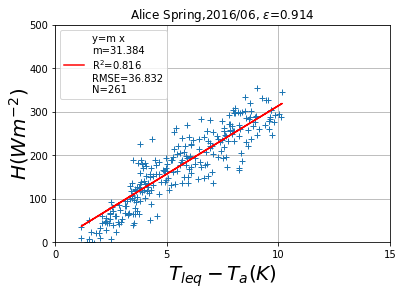

36.83217670169872


In [39]:
opteps_OLS_months2( 2016,HWframe,6,0.914)

39.16614159883871


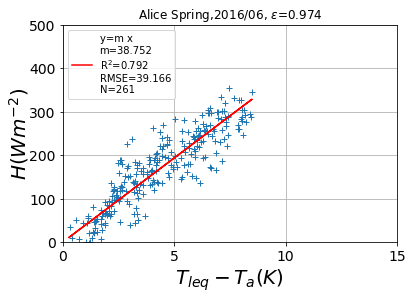

39.16614159883871


In [40]:
opteps_OLS_months2( 2016,HWframe,6,0.974)

### Yearly Plots:

54.928264702052445


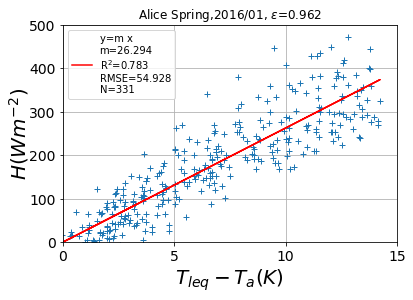

54.928264702052445
49.888774303481874


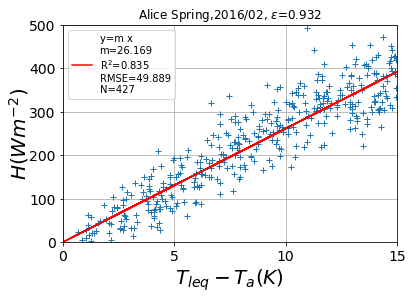

49.888774303481874
49.72522433598555


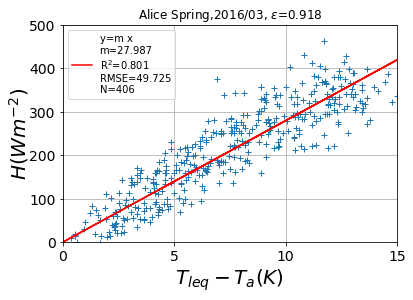

49.72522433598555
42.89724157992242


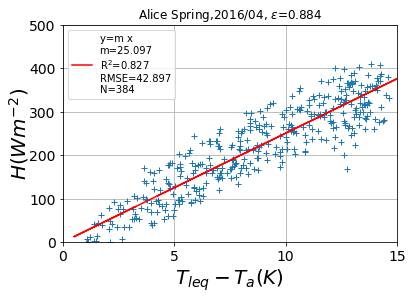

42.89724157992242
41.31891681737568


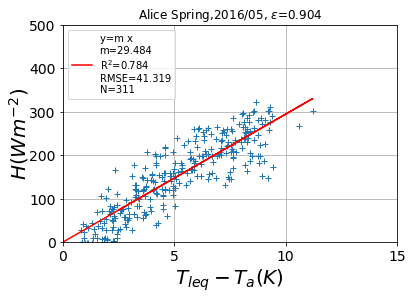

41.31891681737568
36.83217670169872


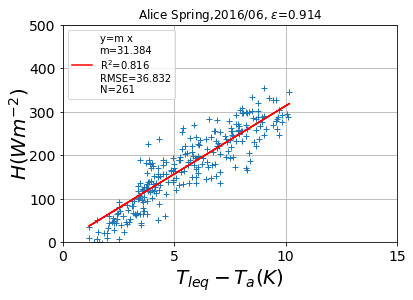

36.83217670169872
38.63853180544428


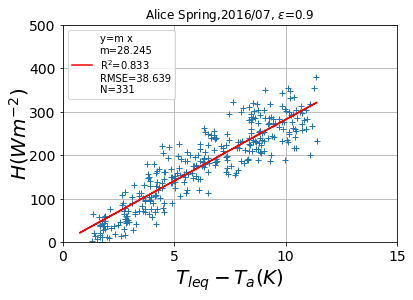

38.63853180544428
45.20648762822917


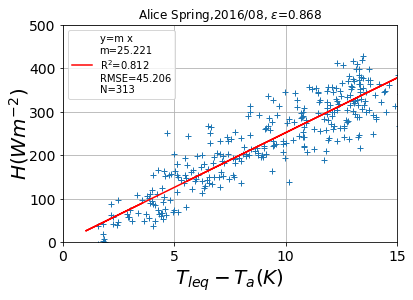

45.20648762822917
43.7543241981903


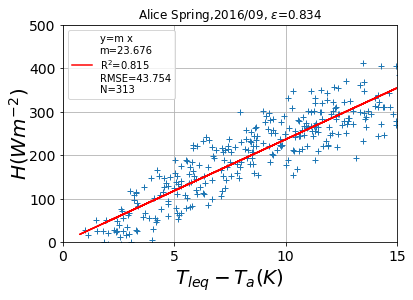

43.7543241981903
54.20482342789247


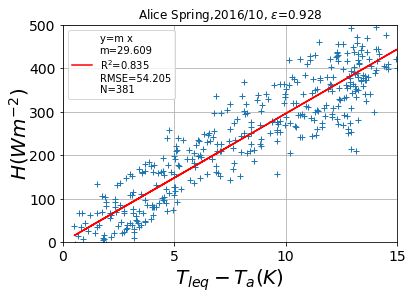

54.20482342789247
53.13946869888456


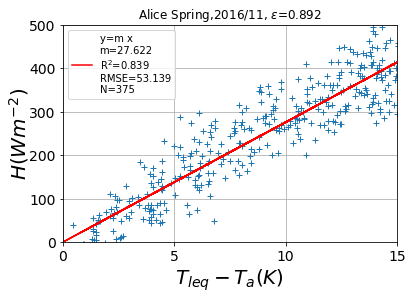

53.13946869888456
57.670700037495216


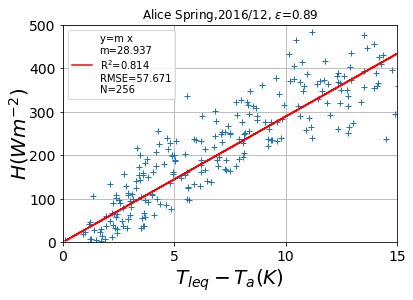

57.670700037495216


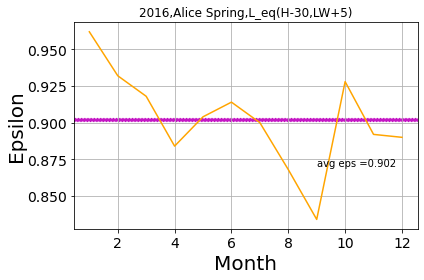

In [41]:
mnth=0
eqdigits=3
yr=2016
list_opt_epsref=[]
for i in range(12):
    mnth=i+1
    opteps_As_ref = pd.DataFrame(columns=["RMSE", "m","eps_ref","R2"]) # pandas dataframe
    opt_eps=opteps_OLS_loop (yr,HWframe,mnth)
    if opt_eps < 1:
        list_opt_epsref.append(opt_eps)
        opteps_OLS_months2(yr,HWframe,mnth,opt_eps)
    else:
        
        list_opt_epsref.append(1)    
    
const=np.mean(list_opt_epsref)
#plt.tight_layout()
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12],list_opt_epsref,color= 'orange')
plt.axhspan(const-0.001,const+0.001,color='m',alpha=0.9, lw=1.2,ls='dotted')
plt.text(9,0.87, "avg eps =" + str(np.round(const,decimals=eqdigits)))
plt.xlabel('Month', ha='center',fontsize=20)
plt.ylabel('Epsilon', labelpad=10, va='center',fontsize=20)
plt.ylabel('Epsilon', labelpad=10, va='center',fontsize=20)
plottitle = '{0},Alice Spring,L_eq(H-30,LW+5)'.format(str(np.round(yr)))
fname = 'AS_le_{0}'.format(str(np.round(yr)))
plt.title(plottitle)
plt.grid()
plt.tight_layout()
plt.savefig(plt_path+fname+'.png',figsize=(10, 5),facecolor='w', edgecolor='w', orientation='portrait')

50.515235056491264


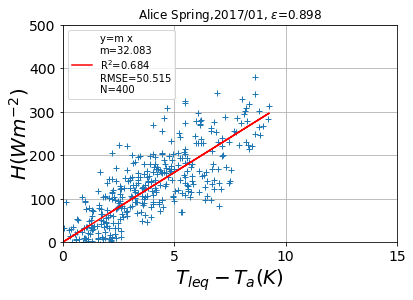

50.515235056491264
42.75767581132046


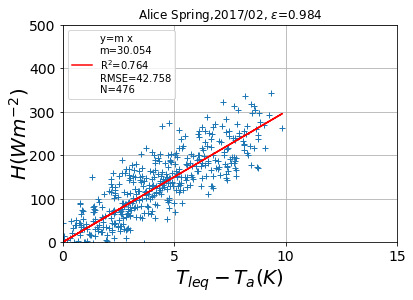

42.75767581132046
42.66392203160885


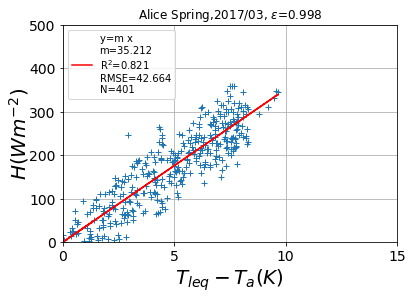

42.66392203160885
48.317769616072944


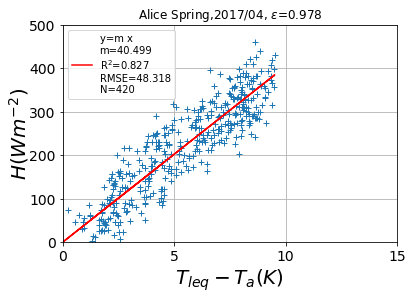

48.317769616072944
46.04871101886256


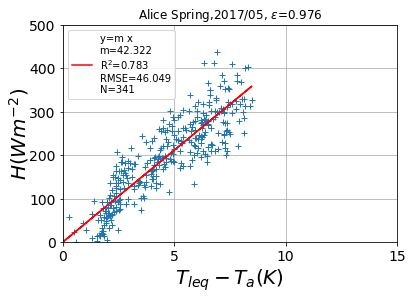

46.04871101886256
41.07539521594256


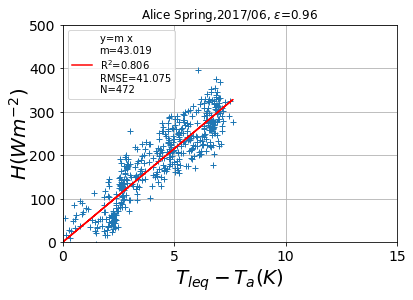

41.07539521594256
39.08471123158875


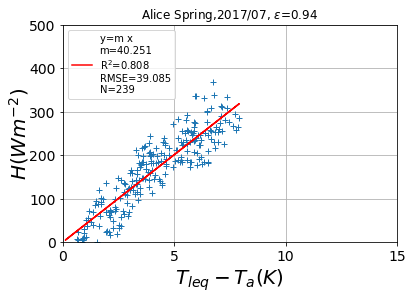

39.08471123158875
39.186456545795494


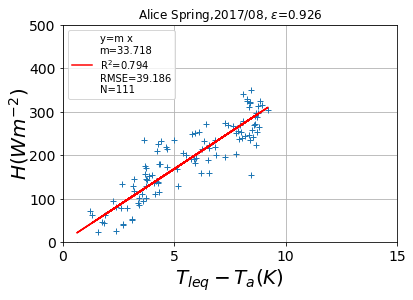

39.186456545795494
52.146655154143666


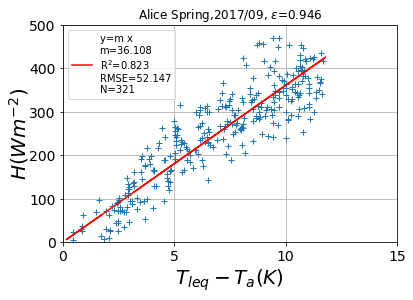

52.146655154143666
63.57407985524085


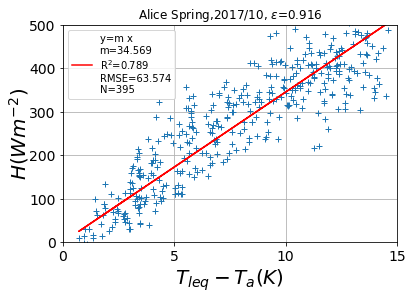

63.57407985524085
56.22541650276377


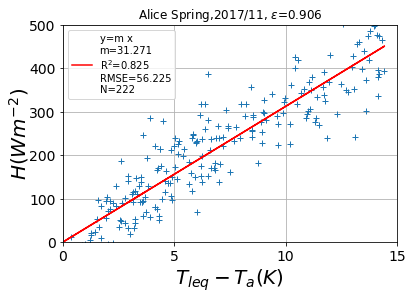

56.22541650276377
54.7552101082026


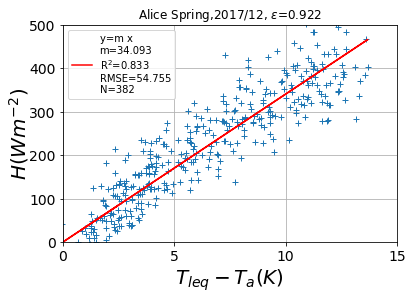

54.7552101082026


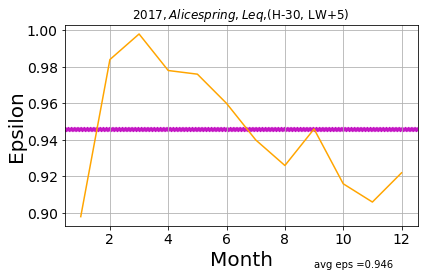

In [42]:
mnth=0
eqdigits=3
yr=2017
list_opt_epsref1=[]
for i in range(12):
    mnth=i+1
    opteps_As_ref = pd.DataFrame(columns=["RMSE", "m","eps_ref","R2"]) # pandas dataframe
    opt_eps=opteps_OLS_loop (yr,HWframe,mnth)
    if opt_eps < 1:
        list_opt_epsref1.append(opt_eps)
        opteps_OLS_months2(yr,HWframe,mnth,opt_eps)
    else:
        
        list_opt_epsref1.append(1)    
    
const=np.mean(list_opt_epsref1)
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12],list_opt_epsref1,color= 'orange')
plt.axhspan(const-0.001,const+0.001,color='m',alpha=0.9, lw=1.2,ls='dotted')
plt.text(9,0.87, "avg eps =" + str(np.round(const,decimals=eqdigits)))
plt.xlabel('Month', ha='center',fontsize=20)
plt.ylabel('Epsilon', labelpad=10, va='center',fontsize=20)
plt.ylabel('Epsilon', labelpad=10, va='center',fontsize=20)
plottitle = r'${0},Alice spring,Leq$,(H-30, LW+5)'.format(str(np.round(yr)))
fname = 'AS_le_{0}'.format(str(np.round(yr)))
plt.title(plottitle)
plt.grid()
plt.tight_layout()
plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')

59.36263644224541


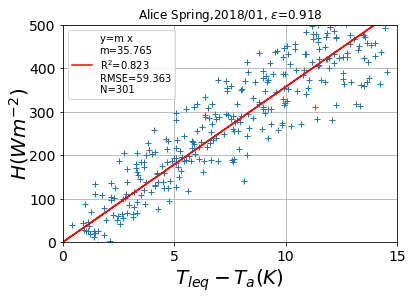

59.36263644224541
61.35257526156684


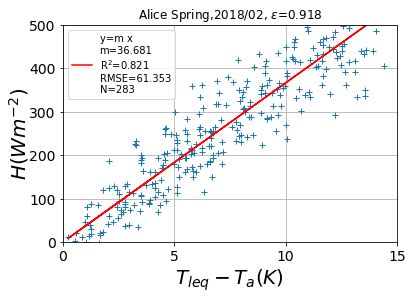

61.35257526156684
56.67461548200136


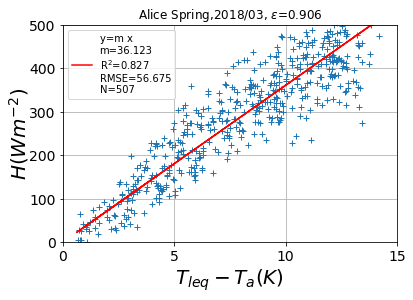

56.67461548200136
53.407983474187034


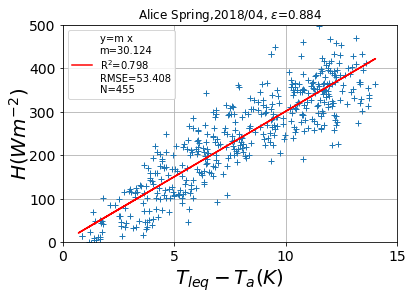

53.407983474187034
48.08984811785009


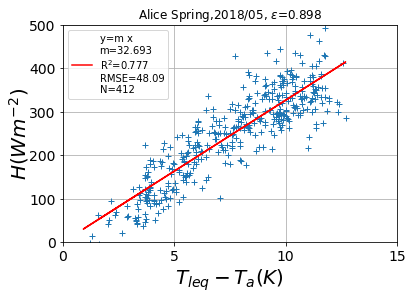

48.08984811785009
43.190935131022215


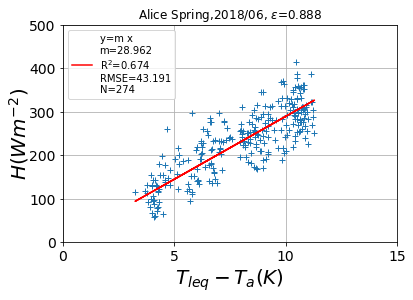

43.190935131022215
44.119061343584605


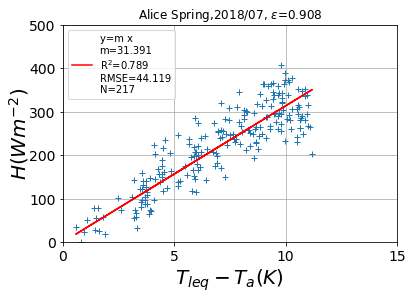

44.119061343584605
53.96368020000178


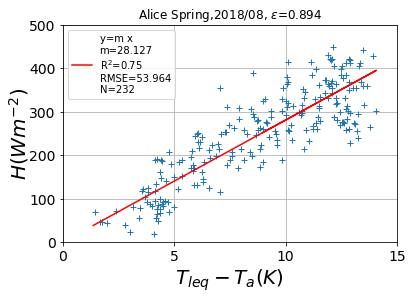

53.96368020000178
59.25388341884792


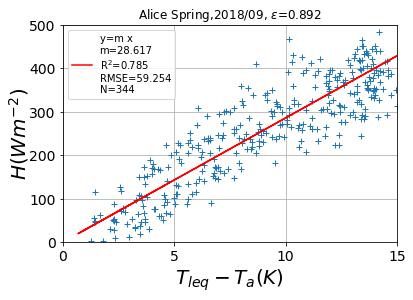

59.25388341884792
56.11575873553872


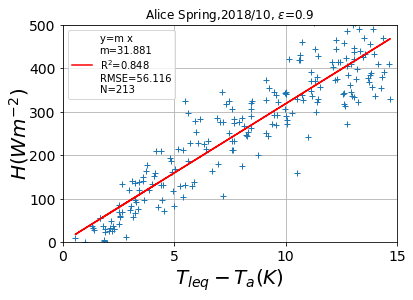

56.11575873553872
54.584158451359215


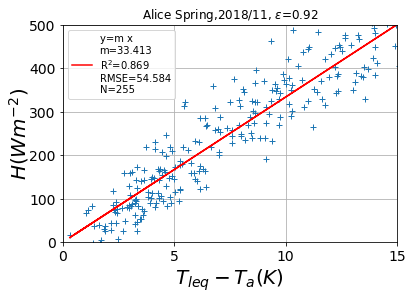

54.584158451359215
59.64505569217042


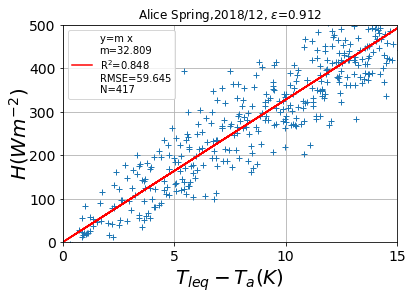

59.64505569217042


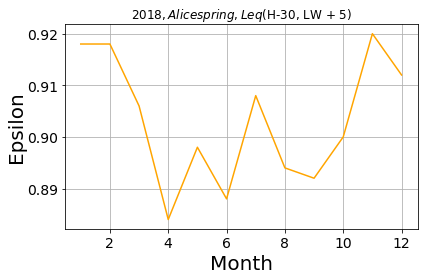

In [43]:
mnth=0
eqdigits=3
yr=2018
list_opt_epsref2=[]
for i in range(12):
    mnth=i+1
    opteps_As_ref = pd.DataFrame(columns=["RMSE", "m","eps_ref","R2"]) # pandas dataframe
    opt_eps=opteps_OLS_loop (yr,HWframe,mnth)
    if opt_eps < 1:
        list_opt_epsref2.append(opt_eps)
        opteps_OLS_months2(yr,HWframe,mnth,opt_eps)
    else:
        
        list_opt_epsref2.append(1)    
    
const=np.mean(list_opt_epsref2)
plt.plot(np.arange(len(list_opt_epsref2))+1,list_opt_epsref2,color= 'orange')
#plt.axhspan(const-0.001,const+0.001,color='m',alpha=0.9, lw=1.2,ls='dotted')
#plt.text(9,0.87, "avg eps =" + str(np.round(const,decimals=eqdigits)))
plt.xlabel('Month', ha='center',fontsize=20)
plt.ylabel('Epsilon', labelpad=10, va='center',fontsize=20)
plt.ylabel('Epsilon', labelpad=10, va='center',fontsize=20)
plottitle = r'${0},Alice spring,Leq$(H-30, LW + 5)'.format(str(np.round(yr)))
fname = 'AS_le_{0}'.format(str(np.round(yr)))
plt.title(plottitle)
plt.grid()
plt.tight_layout()
plt.savefig(plt_path+plottitle+'.png',facecolor='w', edgecolor='w', orientation='portrait')

### opts eps 3years:

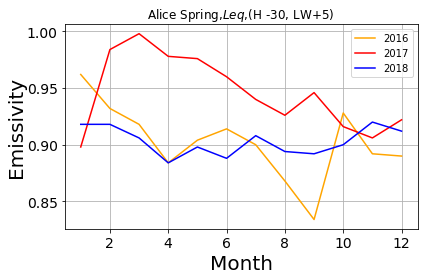

In [44]:
opt_eps_2016=list_opt_epsref.copy()
opt_eps_2017=list_opt_epsref1.copy()
opt_eps_2018=list_opt_epsref2.copy()
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12],opt_eps_2016,color= 'orange', label='2016')
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12],opt_eps_2017,color= 'red',label='2017')
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12],opt_eps_2018,color= 'blue',label='2018')
plt.xlabel('Month', ha='center',fontsize=20)
plt.ylabel('Emissivity', labelpad=10, va='center',fontsize=20)
plt.legend(['2016','2017','2018'])
plottitle = r'Alice Spring,$Leq$,(H -30, LW+5)'
fname = 'AS_le_{0}'.format(str(np.round(yr)))
plt.title(plottitle)
plt.grid()
plt.tight_layout()
plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')

## opt eps: Ignoring reflected

In [45]:
opteps_As = pd.DataFrame(columns=["RMSE", "m","eps","R2"])
def opteps_OLS_loop_1 (years, df_all,mnth,xcol = 'DT1', ycol = 'Fh',
                       epsmin=0.7, epsmax=0.999, epsincr=0.002, eqdigits=3):
    
    
    k=0
    epsilon1=np.arange(epsmin, epsmax, epsincr).tolist() # using array of the epsilon values
    df = df_all[(df_all.index.year == years)& (df_all.index.month == mnth)  & (df_all.Fn > 25) & (df_all.Ws > 2)
         &(df_all.Fld_QCFlag==00)&(df_all.Flu_QCFlag==00)
                &(df_all.Ta_QCFlag==00)&(df_all.Fh_QCFlag==00)]
    
    for j in range(len(epsilon1)) :
        tf_T_s1 = theano_function([R_lout], [eq_Ts_Rlout.rhs.subs(epsilon, epsilon1[j]).
                                                          subs(Variable.__defaults__)], dims={R_lout:1})
        
        tf_T_s12 = theano_function([R_lout], [eq_Ts_Rlout.rhs.subs(epsilon, epsilon1[j]).
                                                          subs(Variable.__defaults__)], dims={R_lout:1})
        list_T_s1 = tf_T_s1(df.Flu +5)
        df = df.assign(T_s1=list_T_s1)
        ##########
        #list_T_s12 = tf_T_s12(df12.Flu)
        #df12 = df12.assign(T_s12=list_T_s12)
       # list_H = df.Fh
        list_DT1 = df.T_s1 - df.T_a
        df = df.assign(DT1=(df.T_s1 - df.T_a))
        
        ###########
        df1 = df.dropna(subset=[xcol, ycol])# for removing nan values
        xdata1 = df1[xcol]
        ydata1 = df1[ycol]
        x=np.array(xdata1)
        y=np.array(ydata1)
        x=x.reshape(-1,1)
        y=(y.reshape(-1,1)-30)
        reg=LinearRegression(fit_intercept=False).fit(x, y) ## 2d x
        m=float(reg.coef_)
        y_pred = m*x
        N=len(y)
        MSE= mean_squared_error(y,y_pred)
        RMSE=float(sqrt(MSE))
        r2=r2_score(y,y_pred)
        if r2 > 0.5:
                 opteps_As.loc[k]=[RMSE, m, epsilon1[j], r2]
        else:
            opteps_As.loc[k]=[np.nan, np.nan, 1, r2]   
            
        k=k+1
        
    
    df_eps= opteps_As.copy()
    
    df_eps.sort_values(by=['RMSE'],ascending=True,inplace=True)
    
    return df_eps.eps.iloc[0]
        
       

In [46]:
opteps_OLS_loop_1 (2016,HWframe,6)

0.9920000000000002

In [47]:
def opteps_OLS_months (years, df_all,mnth,epsilon1,xcol = 'DT1', ycol = 'Fh' , eqdigits=3):
    """Plot a panel per month with H and delT."""
    
    
     # using array of the epsilon values
    df = df_all[(df_all.index.year == years)& (df_all.index.month == mnth)&(df_all.Fn > 25) & (df_all.Ws > 2)
         &(df_all.Fld_QCFlag==00)&(df_all.Flu_QCFlag==00)
                &(df_all.Ta_QCFlag==00)&(df_all.Fh_QCFlag==00)]
    
    ####
    df12 = df_all[(df_all.index.year == years) & (df_all.index.month == mnth) & ((df_all.Fn <25) | (df_all.Ws < 2))]
    
    tf_T_s1 = theano_function([R_lout], [eq_Ts_Rlout.rhs.subs(epsilon, epsilon1).
                                                          subs(Variable.__defaults__)], dims={R_lout:1})
        
    tf_T_s12 = theano_function([R_lout], [eq_Ts_Rlout.rhs.subs(epsilon, epsilon1).
                                                          subs(Variable.__defaults__)], dims={R_lout:1})
    list_T_s1 = tf_T_s1(df.Flu+5)
    df = df.assign(T_s1=list_T_s1)
        ##########
    list_T_s12 = tf_T_s12(df12.Flu)
    df12 = df12.assign(T_s12=list_T_s12)
    list_H = df.Fh
    list_DT1 = df.T_s1 - df.T_a
    df = df.assign(DT1=(df.T_s1 - df.T_a))
    list_DT12 = df12.T_s12 - df12.T_a
    df12 = df12.assign(DT12=(df12.T_s12 - df12.T_a))
        ###########
    df1 = df.dropna(subset=[xcol, ycol])# for removing nan values
    xdata1 = df1[xcol]
    ydata1 = df1[ycol]
    x=np.array(xdata1)
    y=np.array(ydata1)
    x=x.reshape(-1,1)
    y=(y.reshape(-1,1)-30)
    reg=LinearRegression(fit_intercept=False).fit(x, y) ## 2d x
    m=float(reg.coef_)
    y_pred = m*x
    
    N=len(y)
    MSE= mean_squared_error(y,y_pred)
    RMSE=float(sqrt(MSE))
    print(RMSE)
    r2=r2_score(y,y_pred)
    legendtext = 'y=m x \nm={0}\n'r'R$^2$={1}''\nRMSE={2}\nN={3}'.format(str(np.round(m,decimals=eqdigits)),
                                                                 str(np.round(r2,decimals=eqdigits)),
                                                                 str(np.round(RMSE, decimals=eqdigits)),
                                                                 str(np.round(N, decimals=eqdigits)))

        
       
    plt.plot(x,y,"+",label='_nolegend_')#.format(list_months))#.format(list_months))
    
    plt.xlabel(r'$T_{seq} - T_{a} (K)$', ha='center',fontsize=20)
    plt.ylabel(r'$H(W m^{-2})$', labelpad=10, va='center',fontsize=20)
    plt.title('Alice Spring,{0}, $\epsilon$={1}'.format(df.index[0].date().strftime('%Y/%m'), 
                                          str(np.round(epsilon1,decimals=3))))
        
    
        
    plt.xticks([-5,0,5,10,15])
    plt.xlim(0, 15)
    plt.ylim(0, 500)
    plt.plot(x,y_pred, color='red',label=legendtext)# predicted
    plt.legend(loc="upper left")
    plt.grid()
    plt.show()
        
        

44.708308742303664


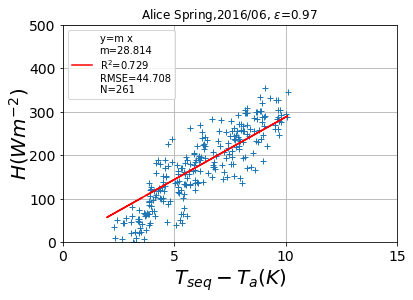

In [48]:
opteps_OLS_months( 2016,HWframe,6,0.970)

43.6284395179176


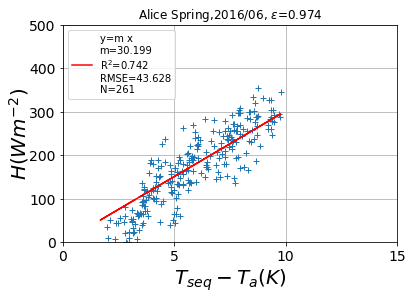

In [49]:
opteps_OLS_months( 2016,HWframe,6,0.974)

55.03614035255238


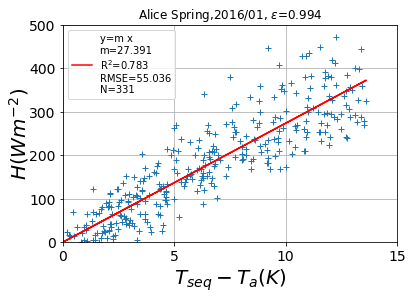

49.78414858148071


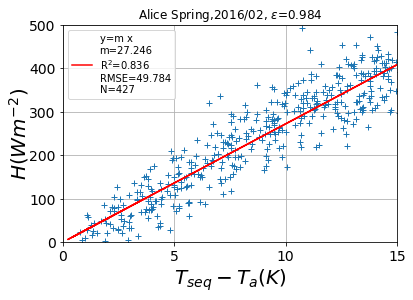

48.42307247711534


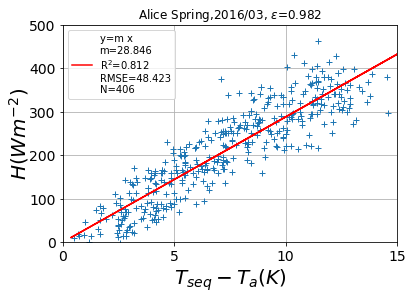

42.918698510712964


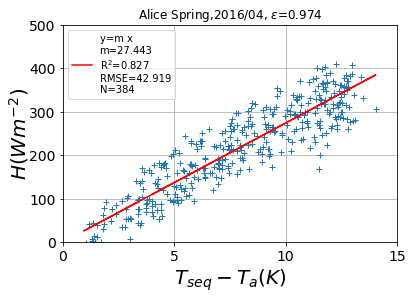

45.25291306799506


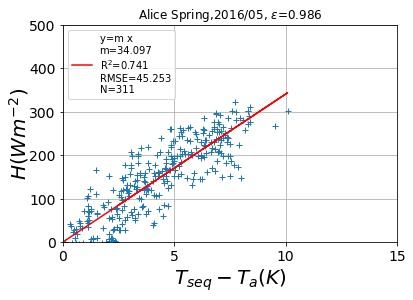

40.75695843730515


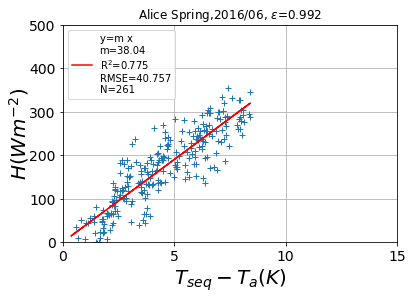

43.572665173272426


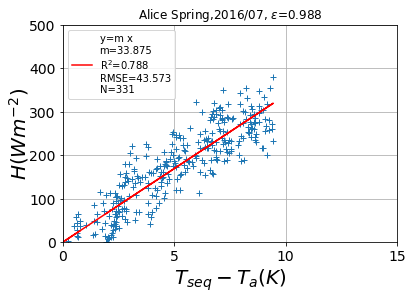

46.43771411771502


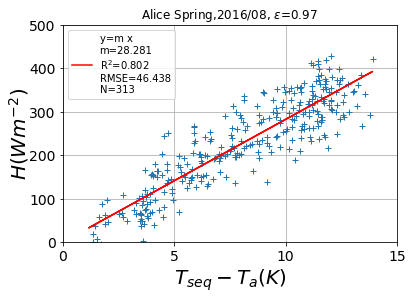

46.82086830269997


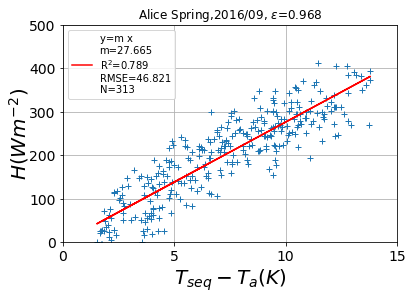

54.83789333810557


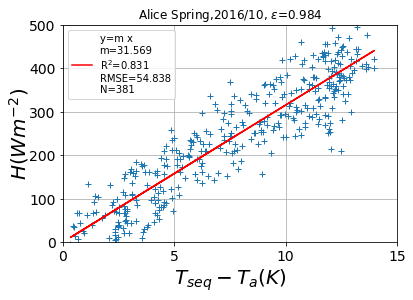

53.11664762382076


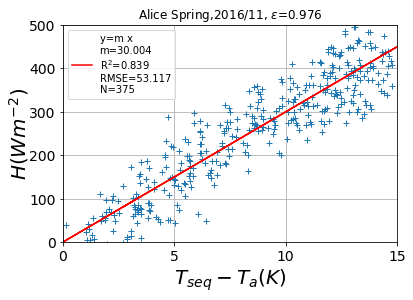

56.35754114609267


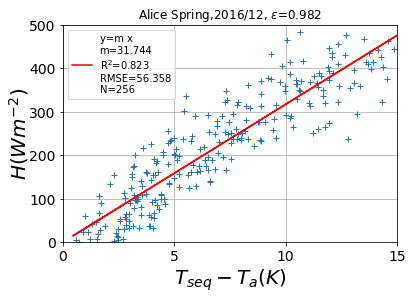

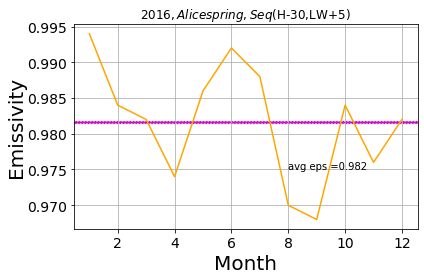

In [50]:
yr=2016
mnth=0
list_opt_epsign=[]
for i in range(12):
    #opt_eps_RMSE_brook = pd.DataFrame(columns=["RMSE", "m","eps","R2"])
    mnth=i+1
    opteps_As = pd.DataFrame(columns=["RMSE", "m","eps","R2"])
    opt_eps=  opteps_OLS_loop_1(yr, HWframe,mnth)
    
    if opt_eps<1:
        list_opt_epsign.append(opt_eps)
        opteps_OLS_months(yr, HWframe,mnth,opt_eps)
       
    else:
        list_opt_epsign.append(1)
    
const=np.mean(list_opt_epsign)
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12],list_opt_epsign,color= 'orange')
plt.axhspan(const-0.0001,const+0.0001,color='m',alpha=0.9, lw=1.2,ls='dotted')
plt.text(8,0.975, "avg eps =" + str(np.round(const,decimals=eqdigits)))    

plt.xlabel('Month', ha='center',fontsize=20)
plt.ylabel('Emissivity', labelpad=10, va='center',fontsize=20)
plottitle = r'${0},Alice spring,Seq$(H-30,LW+5)'.format(str(np.round(yr)))
fname = 'AS_se_{0}'.format(str(np.round(yr)))
plt.title(plottitle)
plt.grid()
plt.tight_layout()
plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

51.772131051773094


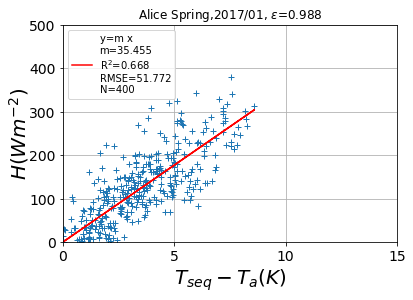

42.92632175961411


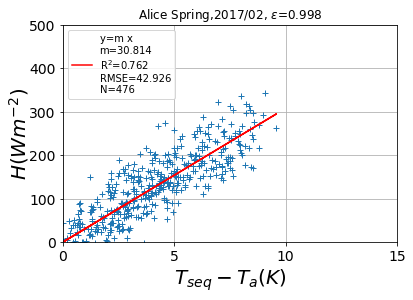

42.845629552345336


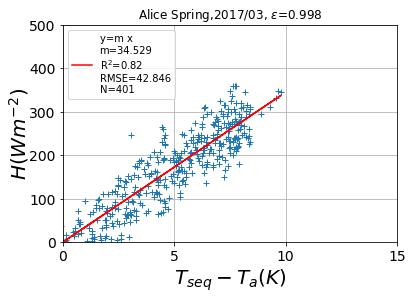

48.54320572287309


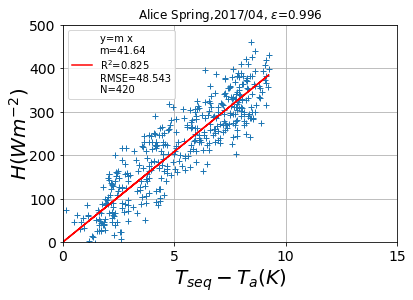

46.05339123082655


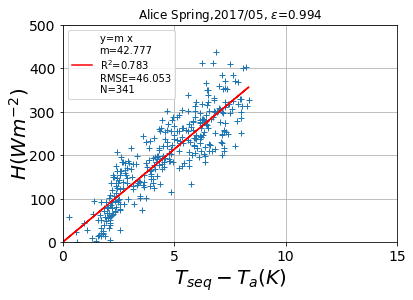

41.5760972878263


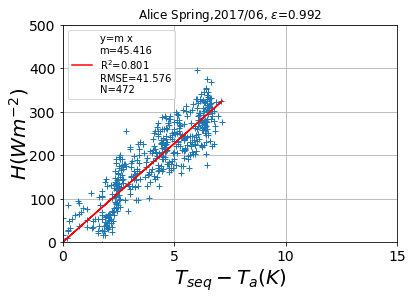

40.96071533035773


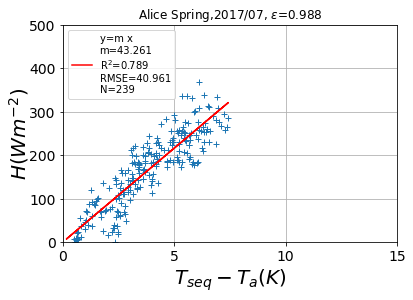

KeyboardInterrupt: 

In [51]:
yr=2017
mnth=0
list_opt_epsign1=[]
for i in range(12):
    #opt_eps_RMSE_brook = pd.DataFrame(columns=["RMSE", "m","eps","R2"])
    mnth=i+1
    opteps_As = pd.DataFrame(columns=["RMSE", "m","eps","R2"])
    opt_eps=  opteps_OLS_loop_1(yr, HWframe,mnth)
    
    if opt_eps<1:
        list_opt_epsign1.append(opt_eps)
        opteps_OLS_months(yr, HWframe,mnth,opt_eps)
       
    else:
        list_opt_epsign1.append(1)
    
const=np.mean(list_opt_epsign1)
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12],list_opt_epsign1,color= 'orange')
plt.axhspan(const-0.0001,const+0.0001,color='m',alpha=0.9, lw=1.2,ls='dotted')
plt.text(8,0.975, "avg eps =" + str(np.round(const,decimals=eqdigits)))    

plt.xlabel('Month', ha='center',fontsize=20)
plt.ylabel('Emissivity', labelpad=10, va='center',fontsize=20)
plottitle = r'${0},Alice spring,Seq$,(H-30,LW+5)'.format(str(np.round(yr)))
fname = 'AS_se_{0}'.format(str(np.round(yr)))
plt.title(plottitle)
plt.grid()
plt.tight_layout()
plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

In [ ]:
yr=2018
mnth=0
list_opt_epsign2=[]
for i in range(12):
    #opt_eps_RMSE_brook = pd.DataFrame(columns=["RMSE", "m","eps","R2"])
    mnth=i+1
    opteps_As = pd.DataFrame(columns=["RMSE", "m","eps","R2"])
    opt_eps=  opteps_OLS_loop_1(yr, HWframe,mnth)
    
    if opt_eps<1:
        list_opt_epsign2.append(opt_eps)
        opteps_OLS_months(yr, HWframe,mnth,opt_eps)
       
    else:
        list_opt_epsign2.append(1)
    
const=np.mean(list_opt_epsign2)
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12],list_opt_epsign2,color= 'orange')
plt.axhspan(const-0.0001,const+0.0001,color='m',alpha=0.9, lw=1.2,ls='dotted')
plt.text(8,0.975, "avg eps =" + str(np.round(const,decimals=eqdigits)))    

plt.xlabel('Month', ha='center',fontsize=20)
plt.ylabel('Emissivity', labelpad=10, va='center',fontsize=20)
plottitle = r'${0},Alice spring,Seq(H-30,LW +5)$'.format(str(np.round(yr)))
fname = 'AS_se_{0}'.format(str(np.round(yr)))
plt.title(plottitle)
plt.grid()
plt.tight_layout()
plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

In [ ]:
opteps_ign_2016=list_opt_epsign.copy()
opteps_ign_2017=list_opt_epsign1.copy()
opteps_ign_2018=list_opt_epsign2.copy()
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12],opteps_ign_2016,color= 'orange', label='2016')
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12],opteps_ign_2017,color= 'red',label='2017')
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12],opteps_ign_2018,color= 'blue',label='2018')

plt.xlabel('Month', ha='center',fontsize=20)

plt.ylabel('Emissivity', labelpad=10, va='center',fontsize=20)
plt.legend(['2016','2017','2018'])
plottitle = r'Alice Spring,$Seq$'
fname = 'AS_seq_{0}'.format(str(np.round(yr)))
plt.title(plottitle)
plt.grid()
plt.tight_layout()
plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')


## emissivity sensitivity

In [ ]:
def plot_eps_Ts_Ts1 (df_all,year,mnth,days,hours):
    """Two longwave formulation sensitivity to chosen emissivity"""
    
   
    df = df_all[(df_all.index.year == year) & (df_all.index.month == mnth) &(df_all.index.day == days)&  (df_all.index.hour == hours)& (df_all.index.minute == 0)]
                #&(df_all.Fld_QCFlag==00)&(df_all.Flu_QCFlag==00)
                #&(df_all.Ta_QCFlag==00)&(df_all.Fh_QCFlag==00)]   
    epsilon1=np.arange(0.8,1,0.01)
    ign_rad=[]
    con_rad=[]
    for j in range(len(epsilon1)):
            
        tf_T_s1 = theano_function([R_lout], [eq_Ts_Rlout.rhs.subs(epsilon, epsilon1[j]).
                                                          subs(Variable.__defaults__)], dims={R_lout:1})
                                                       
            
        list_T_s1 = tf_T_s1(df.Flu)
        df = df.assign(T_s1=list_T_s1)
        tf_T_s = theano_function([R_lin, R_lout], [eq_Ts_Rlout_Rlin.rhs.subs(epsilon, epsilon1[j]).
                                                          subs(Variable.__defaults__)], dims={R_lin:1, R_lout:1})
                                                       
        list_T_s = tf_T_s(df.Fld,df.Flu)
        df = df.assign(T_s=list_T_s)
           
            
        ign_rad.append(df.T_s1)
        con_rad.append(df.T_s)
    plt.figure(figsize=(6,4))
    plt.plot(epsilon1,ign_rad,".",label='Seq',color='blue')
    plt.plot(epsilon1,con_rad,"*",label='Leq',color='orange')#.format(list_months))
    plt.ylabel('LST (K)', ha='center',fontsize=20)
    plt.xlabel('Emissivity ', labelpad=10, va='center',fontsize=20)
    #plt.title('{0} @ {1} h'.format(df.index[0].date().strftime('%Y/%m/%d'),hours))
    plt.xticks([0.8,0.85,0.9,0.95,1])
    plottitle = 'Alice Spring,{0} @ {1} h'.format(df.index[0].date().strftime('%Y/%m/%d'),hours)
    fname = 'Alice spring_Ts_sensitivity_{0}'.format(str(np.round(2005)))
    plt.title(plottitle)
    plt.grid()
    plt.tight_layout()
    plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')
    plt.legend()
    plt.show()
    
       


In [ ]:
plot_eps_Ts_Ts1 (HWframe,2017,3,15,12)

### Precipitation and emissivity:

In [ ]:
#ncfile.info()

In [ ]:
#HWframe.Precip

### writing opt epsilon values
opteps_seq=list_opt_epsign+ list_opt_epsign1+ list_opt_epsign2
opteps_leq=list_opt_epsref + list_opt_epsref1 + list_opt_epsref2
###
df=HWframe.copy()
#prec=df.Precip.resample('M').sum()
#precip1=prec
#to_plotprecip=pd.DataFrame(precip1)
#to_plotprecip['opteps_seq']=opteps_seq
#to_plotprecip['opteps_leq']=opteps_leq
fig=plt.figure(figsize=(12,10))
#plt.bar(to_plotprecip.index,precip1,width=8, color='blue')
#plt.ylabel('Precipitation (mm)',fontsize=20)      
plt.xticks(rotation=45)

#ax2 = plt.twinx()
ax2.set_ylabel(r'$Emissivity(\epsilon)$', fontsize=20)
ax2.set_xlabel('Months',fontsize=20)

mnth_tot=to_plotprecip.index
mnth_seq=mnth_tot[to_plotprecip.opteps_seq<1]
opteps_seqtry=to_plotprecip.opteps_seq[to_plotprecip.opteps_seq<1]

mnth_tot=to_plotprecip.index
mnth_leq=mnth_tot[to_plotprecip.opteps_leq<1]
opteps_leqtry=to_plotprecip.opteps_leq[to_plotprecip.opteps_leq<1]
plt.plot(mnth_seq,opteps_seqtry,color='orange',label='Seq')
plt.plot(mnth_leq,opteps_leqtry,color='green',label='Leq')
fname = 'Alice spring_epsand precipitation{0}'
plt.title('Estimated emissivity and rainfall @ Alice Spring', fontsize=20)
plt.grid()
fig.tight_layout()
plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')
plt.legend()
plt.show()

In [ ]:
df_16 = Df12[(Df12.index.year == 2016)]
df_prec16=df_prec12[(df_prec12.index.year==2016)]
df=df_16.copy()
epsilon1=0.827
epsilon2=0.967
eqdigits=3

tf_T_s1 = theano_function([R_lout], [eq_Ts_Rlout.rhs.subs(epsilon, epsilon2).
                                              subs(Variable.__defaults__)], dims={R_lout:1})


list_T_s1 = tf_T_s1(df.Flu)
df = df.assign(T_s1=list_T_s1)
list_DT1 = df.T_s1 - df.modistemp
df = df.assign(DT1=(df.T_s1 - df.modistemp))
##print()
#####
tf_T_s = theano_function([R_lin, R_lout], [eq_Ts_Rlout_Rlin.rhs.subs(epsilon, epsilon1).
                                          subs(Variable.__defaults__)], dims={R_lin:1, R_lout:1})

list_T_s = tf_T_s(df.Fld,df.Flu)
df = df.assign(T_s=list_T_s)
list_DT = df.T_s - df.modistemp
df = df.assign(DT=(df.T_s - df.modistemp))
df_mod= df.dropna(subset=['modistemp'])                     #df.modistemp[ ~isnan(df.modistemp) |  ~ isnan(df.T_s)  ]
#print(df_mod)
y=df_mod.modistemp
y1=df_mod.DT
y2=df_mod.DT1
precp=df_prec16.Precip


#legendtext1 = 'y=m1 x \nm1={0}\n'r'R$^2$={1}''\nRMSE={2}\nN={3}'.format(str(np.round(m1,decimals=eqdigits)),
                                                         #str(np.round(r2,decimals=eqdigits)),
                                                         #str(np.round(RMSE1, decimals=eqdigits)),
                                                         #str(np.round(N1, decimals=eqdigits)))


#plt.plot(x,y1, '.k')
#plt.plot(df_mod.index,df.)

###
fig, ax1 = plt.subplots(figsize=(9,6))
#plt.subplots(figsize=(9,6))
plt.xticks(rotation=45)
color = 'tab:green'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Tec-Tmodis (K)', color=color)
ax1.plot(df_mod.index,y1,'b',label='Ts - Tmodis')#loc = 'center left')
ax1.plot(df_mod.index,y2,'k',label='Ts1 - Tmodis')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Precipitation', color=color)  # we already handled the x-label with ax1
ax2.plot(df_mod.index, precp,'r')
ax2.tick_params(axis='y', labelcolor=color)
plt.legend(loc="center left")
plt.grid()
plt.show()



## interpolate dataframe:

In [ ]:
df=pd.DataFrame(HWframe)
df_inter=df[["Fh", "Fld","Flu", "Ta","Ws_CSAT","Fn"]].resample('min')
Df1= df_inter.interpolate()
#Df1

In [ ]:
file_mod = '/home/thakur_21505/Documents/git_projects/aerodynamic_conductances/jupyter/leonardo_conference/data/modis_txt/alispr_moddata.csv'


In [ ]:
modis_file = pd.read_csv(file_mod)#engine='python',header=None)
modis_file1=pd.DataFrame(modis_file)
#modis_file

In [ ]:
modis_file1.index=modis_file1.timestamp

mod_2=pd.to_datetime(modis_file1.index)### converting timestamp to 


In [ ]:
Df12=Df1.copy()
Df12.index=pd.to_datetime(Df12.index)
Df12=Df12.reindex(mod_2)
#Df12

In [ ]:
## adding modis temp into dataframe:
Df12['modistemp']=modis_file1.LST

In [ ]:
DF=modis_file.copy()
DF = DF.replace(0.490, np.NaN)### replacing all the values with an offset
e_mod = (0.4587*DF.eps_31 + 0.5414*DF.eps_32)
eps_mod = e_mod.mean()
#print(e_mod)
print(eps_mod)
DF=DF.interpolate()

DF

In [ ]:
Df12['eps_mod']= e_mod
Df12=Df12.sort_index()
#Df12

## showing difference  in errors using:longwave and lst using modis data:

In [ ]:
## estimating flu using  fld and modis temp for a month
df_all=Df12.copy()
df_all= df_all.dropna(subset=['modistemp','Fld','Flu'])  
#df_all=df.dropna(subset=['modistemp','Fld','Flu']) 
eqdigits=3
lu_ec=[]
lu_calc=[]
list_months= 7
yr=2016##list(range(1,13))
epsilon1=0.974
df=df_all.copy()
#df = df_all[(df_all.index.year == yr) & (df_all.index.month == list_months)]

tf_lu = theano_function([R_lin, T_s], [eq_Rlout_Rlin.rhs.subs(epsilon, epsilon1).
                                                              subs(Variable.__defaults__)], dims={R_lin:1, T_s:1})

list_lu = tf_lu(df.Fld,df.modistemp)
df = df.assign(flu=list_lu)
lu_calc.append(list_lu.tolist())
flat_lu_calc=list(chain.from_iterable(lu_calc))
lu_ec.append(df.Flu)
flat_lu_ec=list(chain.from_iterable(lu_ec))

        
        
       

x= flat_lu_calc                    
y= flat_lu_ec
#print(len(x))
#print(len(y))
x=np.array(x)
y=np.array(y)
## removing nan values from y 
x=x.reshape(-1,1)
y=y.reshape(-1,1)
reg=LinearRegression().fit(x, y) ## 2d x
m=float(reg.coef_.flatten())
c= float(reg.intercept_)
y_pred = m*x + c
MSE= mean_squared_error(y,y_pred)
RMSE=float(sqrt(MSE))
N=len(y)
r2=r2_score(y,y_pred)
#bias=np.mean(y- (y_pred))
#bias=np.mean((y-y_pred)**2)
bias=np.mean((x - y_pred))

legendtext = 'y=m x + c \nm={0}\nc={1}\n'r'R$^2$={2}''\nRMSE={3}\nN={4}''\nbias={5}'.format(str(np.round(m,decimals=eqdigits)),
                                                         str(np.round(c,decimals=eqdigits)),
                                                         str(np.round(r2,decimals=eqdigits)),
                                                         str(np.round(RMSE, decimals=eqdigits)),
                                                         str(np.round(N, decimals=eqdigits)),
                                                         str(np.round(bias, decimals=eqdigits))                                   )

plt.plot(x,y,'.b',label='_none_')
plt.plot(x,y_pred, "--" ,color='g',label=legendtext)#
plt.plot([-9999,9999],[-9999,9999], color='k')# predicted
plt.xlim(273, 500)
plt.ylim(273, 500)
plt.text(320,320,'1:1',fontsize=20)
plt.legend(loc="upper left")
plt.xlabel(r'$L_{up} estimated(LEQ)$', ha='center',fontsize=20)
plt.ylabel(r'$L_{up} measured$', ha='center',fontsize=20)
plottitle = r'Alice  Spring,LEQ'
fname = 'AS_Lup_measured and calc'
plt.title(plottitle)
plt.grid()
fig.tight_layout()
plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')
plt.show()




## short equation

In [ ]:
## estimating flu using  fld and modis temp for a month
df_all=Df12.copy()
df_all1= df_all.dropna(subset=['modistemp','Flu'])  
#df_all=df.dropna(subset=['modistemp','Fld','Flu']) 
eqdigits=3
lu_ec=[]
lu_calc=[]
list_months= 7
yr=2016##list(range(1,13))
epsilon1=0.974
df=df_all1.copy()
#df = df_all[(df_all.index.year == yr) & (df_all.index.month == list_months)]

tf_lu = theano_function([T_s], [eq_Rlout.rhs.subs(epsilon, epsilon1).
                                                              subs(Variable.__defaults__)], dims={T_s:1})

list_lu = tf_lu(df.modistemp)
df = df.assign(flu=list_lu)
lu_calc.append(list_lu.tolist())
flat_lu_calc=list(chain.from_iterable(lu_calc))
lu_ec.append(df.Flu)
flat_lu_ec=list(chain.from_iterable(lu_ec))

        
        
       
x= flat_lu_calc                    
y= flat_lu_ec
print(len(x))
#y= flat_lu_calc
print(len(y))
x=np.array(x)
y=np.array(y)
## removing nan values from y 
x=x.reshape(-1,1)
y=y.reshape(-1,1)
reg=LinearRegression().fit(x, y) ## 2d x
m=float(reg.coef_.flatten())
c= float(reg.intercept_)
y_pred = m*x + c
MSE= mean_squared_error(y,y_pred)
RMSE=float(sqrt(MSE))
N=len(y)
r2=r2_score(y,y_pred)
#bias=np.mean(y- (y_pred))
#bias=np.mean((y-y_pred)**2)
bias=np.mean((x - y_pred))

legendtext = 'y=m x + c \nm={0}\nc={1}\n'r'R$^2$={2}''\nRMSE={3}\nN={4}''\nbias={5}'.format(str(np.round(m,decimals=eqdigits)),
                                                         str(np.round(c,decimals=eqdigits)),
                                                         str(np.round(r2,decimals=eqdigits)),
                                                         str(np.round(RMSE, decimals=eqdigits)),
                                                         str(np.round(N, decimals=eqdigits)),
                                                         str(np.round(bias, decimals=eqdigits))                                   )

plt.plot(x,y,'.k',label='_none_')
plt.plot(x,y_pred, "--" ,color='g',label=legendtext)#
plt.plot([-9999,9999],[-9999,9999], color='k')# predicted
plt.xlim(273, 500)
plt.ylim(273, 500)
plt.text(320,320,'1:1',fontsize=20)
plt.legend(loc="upper left")
plt.xlabel(r'$L_{up}estimated (seq)$', ha='center',fontsize=20)
plt.ylabel(r'$L_{up}measured$', ha='center',fontsize=20)
plottitle = r'Alice  Spring,SEQ'
fname = 'AS_Lup_estimated using seq'
plt.title(plottitle)
plt.grid()
fig.tight_layout()
plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')
plt.show()



## opt eps modisT

In [ ]:
df_all=Df12.copy()
df_all= df_all.dropna(subset=['modistemp','Fld','Flu'])  
#df_all=df.dropna(subset=['modistemp','Fld','Flu']) 
eqdigits=3
opt_Ts=[]
Tmod=[]
list_months= list(range(1,13))

for yr in range(2016,2019):
    
    for i in range(12):
        if yr == 2016:
            epsilon1= list_opt_epsref
            
        elif yr == 2017:
            epsilon1=list_opt_epsref1
           
        elif yr == 2018:
            epsilon1=list_opt_epsref2
            
        if epsilon1[i]!= 1:
        
            
        
            df = df_all[(df_all.index.year == yr) & (df_all.index.month == list_months[i])]

            tf_T_s = theano_function([R_lin, R_lout], [eq_Ts_Rlout_Rlin.rhs.subs(epsilon, epsilon1[i]).
                                                              subs(Variable.__defaults__)], dims={R_lin:1, R_lout:1})

            list_T_s = tf_T_s(df.Fld,df.Flu)
            df = df.assign(T_s=list_T_s)
            opt_Ts.append(list_T_s.tolist())
            flat_optTs=list(chain.from_iterable(opt_Ts))
            Tmod.append(df.modistemp)
            flat_Tmod=list(chain.from_iterable(Tmod))
        else :
            print('no opt epsilon',i+1)
        
        
        
       
                    
x= flat_Tmod
print(len(x))
y= flat_optTs
print(len(y))
x=np.array(x)
y=np.array(y)
## removing nan values from y 
x=x.reshape(-1,1)
y=y.reshape(-1,1)
reg=LinearRegression().fit(x, y) ## 2d x
m=float(reg.coef_.flatten())
c= float(reg.intercept_)
y_pred = m*x + c
MSE= mean_squared_error(y,y_pred)
RMSE=float(sqrt(MSE))
N=len(y)
r2=r2_score(y,y_pred)
#bias=np.mean(y- (y_pred))
#bias=np.mean((y-y_pred)**2)
bias=np.mean((x - y_pred))

legendtext = 'y=m x + c \nm={0}\nc={1}\n'r'R$^2$={2}''\nRMSE={3}\nN={4}''\nbias={5}'.format(str(np.round(m,decimals=eqdigits)),
                                                         str(np.round(c,decimals=eqdigits)),
                                                         str(np.round(r2,decimals=eqdigits)),
                                                         str(np.round(RMSE, decimals=eqdigits)),
                                                         str(np.round(N, decimals=eqdigits)),
                                                         str(np.round(bias, decimals=eqdigits))                                   )

plt.plot(x,y,'.b',label='_none_')
plt.plot(x,y_pred, "--" ,color='g',label=legendtext)#
plt.plot([-9999,9999],[-9999,9999], color='k')# predicted
plt.xlim(273, 330)
plt.ylim(273, 330)
plt.text(320,320,'1:1',fontsize=20)
plt.legend(loc="upper left")
plt.xlabel(r'$T_{MODIS}$', ha='center',fontsize=20)
plt.ylabel(r'$T_{leq}$', ha='center',fontsize=20)
plottitle = r'Alice  Spring,$\epsilon_{Leq}$'
fname = 'AS_optps_leq_modis'
plt.title(plottitle)
plt.grid()
fig.tight_layout()
plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')
plt.show()
######################
                                                



  

### Ts1 

In [ ]:
df_all1=Df12.copy()
df_all1= df_all1.dropna(subset=['modistemp','Flu'])  
#df_all=df.dropna(subset=['modistemp','Fld','Flu']) 
eqdigits=3
opt_Ts1=[]
list_months= list(range(1,13))

for yr in range(2016,2018):
    
    for i in range(12):
        if yr == 2016:
            epsilon1= list_opt_epsign
            
        elif yr == 2017:
            epsilon1=list_opt_epsign1
           
        elif yr == 2018:
            epsilon1=list_opt_epsign2
            
        if epsilon1[i]!= 1:
        
              
            



        
            df = df_all1[(df_all1.index.year == yr) & (df_all1.index.month == list_months[i])]
        
            tf_T_s1 = theano_function([R_lout], [eq_Ts_Rlout.rhs.subs(epsilon, epsilon1[i]).
                                              subs(Variable.__defaults__)], dims={R_lout:1})


            list_T_s1 = tf_T_s1(df.Flu)
            df = df.assign(T_s1=list_T_s1)
            opt_Ts1.append(list_T_s1.tolist())
            flat_optTs1=list(chain.from_iterable(opt_Ts1))
        
        else :
            print('no opt epsilon',i+1)
        
       
                    


y1= flat_optTs1
print(len(y))

y1=np.array(y1)

y1=y1.reshape(-1,1)
reg1=LinearRegression().fit(x, y1) ## 2d x
m1=float(reg1.coef_.flatten())
c1=float(reg1.intercept_)
y1_pred = m1*x + c1
MSE1= mean_squared_error(y1,y1_pred)
RMSE1=float(sqrt(MSE1))
N1=len(y1)
r21=r2_score(y1,y1_pred)
bias1= np.mean((x - y1_pred ))

legendtext1 = 'y=m x + c \nm={0}\nc={1}\n'r'R$^2$={2}''\nRMSE={3}\nN={4}''\nbias={5}'.format(str(np.round(m1,decimals=eqdigits)),
                                                         str(np.round(c1,decimals=eqdigits)),
                                                         str(np.round(r21,decimals=eqdigits)),
                                                         str(np.round(RMSE1, decimals=eqdigits)),
                                                         str(np.round(N1, decimals=eqdigits)),
                                                         str(np.round(bias1, decimals=eqdigits))                                   )

plt.plot(x,y1,'.k',label='_none_')
plt.plot(x,y1_pred, "--" ,color='g',label=legendtext1)#
plt.plot([-9999,9999],[-9999,9999], color='k')# predicted
plt.xlim(273, 330)
plt.ylim(273, 330)
plt.text(320,320,'1:1',fontsize=20)
plt.legend(loc="upper left")
plt.xlabel(r'$T_{MODIS}$', ha='center',fontsize=20)
plt.ylabel(r'$T_{seq}$', ha='center',fontsize=20)
plottitle = r'Alice Spring,$\epsilon_{Seq}$'
fname = 'AS_optps_seq_modis{0}'.format(str(np.round(yr)))
plt.title(plottitle)
plt.grid()
fig.tight_layout()
plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

                                                



In [ ]:
df_all=Df12.copy()
df_all= df_all.dropna(subset=['modistemp','Fld','Flu'])   
eqdigits=3
epsilon1 = 0.974

tf_T_s = theano_function([R_lin, R_lout], [eq_Ts_Rlout_Rlin.rhs.subs(epsilon, epsilon1).
                                                              subs(Variable.__defaults__)], dims={R_lin:1, R_lout:1})

list_T_s = tf_T_s(df_all.Fld,df_all.Flu)
#print(list_T_s)
        
        
       
                   
x=df_all.modistemp
print(len(x))
y= list_T_s 
print(len(y))
x=np.array(x)
y=np.array(y)
x=x.reshape(-1,1)
y=y.reshape(-1,1)
reg=LinearRegression().fit(x, y) ## 2d x
m=float(reg.coef_.flatten())
c=float(reg.intercept_)
y_pred = m*x + c
MSE= mean_squared_error(y,y_pred)
RMSE=float(sqrt(MSE))
N=len(y)
r2=r2_score(y,y_pred)
bias= np.mean((x - y_pred))

legendtext = 'y=m x + c \nm={0}\nc={1}\n'r'R$^2$={2}''\nRMSE={3}\nN={4}''\nbias={5}'.format(str(np.round(m,decimals=eqdigits)),
                                                         str(np.round(c,decimals=eqdigits)),
                                                         str(np.round(r2,decimals=eqdigits)),
                                                         str(np.round(RMSE, decimals=eqdigits)),
                                                         str(np.round(N, decimals=eqdigits)),
                                                         str(np.round(bias, decimals=eqdigits))                                   )

plt.plot(x,y,'.b',label='_none_')
plt.plot(x,y_pred, "--" ,color='g',label=legendtext)#
plt.plot([-9999,9999],[-9999,9999], color='k')# predicted
plt.xlim(273, 330)
plt.ylim(273, 330)
plt.text(320,320,'1:1',fontsize=20)
plt.legend(loc="upper left")
plt.xlabel(r'$T_{MODIS}$', ha='center',fontsize=20)
plt.ylabel(r'$T_{Leq}$', ha='center',fontsize=20)
plottitle = r'Alice Spring,$\epsilon_{MODIS}$'
fname = 'as_modiseps_leq_modis{0}'.format(str(np.round(2005)))
plt.title(plottitle)
plt.grid()
fig.tight_layout()
plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')
plt.show()
######################
                                                



  

In [ ]:
df_all1=Df12.copy()
df_all1= df_all1.dropna(subset=['modistemp','Flu'])  
eqdigits=3
epsilon1=0.974

        
          
tf_T_s1 = theano_function([R_lout], [eq_Ts_Rlout.rhs.subs(epsilon, epsilon1).
                                              subs(Variable.__defaults__)], dims={R_lout:1})


list_T_s1 = tf_T_s1(df_all1.Flu)


        
        
       
                    
x=df_all1.modistemp
print(len(x))
x=np.array(x)
x=x.reshape(-1,1)
y1= list_T_s1
print(len(y))
y1=np.array(y1)
## removing nan values from y 
y1=y1.reshape(-1,1)
reg1=LinearRegression().fit(x, y1) ## 2d x
#m=flatten(reg.coef_)
m1=float(reg1.coef_.flatten())
c1=float(reg1.intercept_)
y1_pred = m1*x + c1
MSE1= mean_squared_error(y1,y1_pred)
RMSE1=float(sqrt(MSE1))
#print(RMSE)
N1=len(y1)
r21=r2_score(y1,y1_pred)
bias1= np.mean((x - y1_pred))

legendtext1 = 'y=m x + c \nm={0}\nc={1}\n'r'R$^2$={2}''\nRMSE={3}\nN={4}''\nbias={5}'.format(str(np.round(m1,decimals=eqdigits)),
                                                         str(np.round(c1,decimals=eqdigits)),
                                                         str(np.round(r21,decimals=eqdigits)),
                                                         str(np.round(RMSE1, decimals=eqdigits)),
                                                         str(np.round(N1, decimals=eqdigits)),
                                                         str(np.round(bias1, decimals=eqdigits))                                   )

plt.plot(x,y1,'.k',label='_none_')
plt.plot(x,y1_pred, "--" ,color='g',label=legendtext1)#
plt.plot([-9999,9999],[-9999,9999], color='k')# predicted
plt.xlim(273, 330)
plt.ylim(273, 330)
plt.text(320,320,'1:1',fontsize=20)
plt.legend(loc="upper left")
plt.xlabel(r'$T_{MODIS}$', ha='center',fontsize=20)
plt.ylabel(r'$T_{Seq}$', ha='center',fontsize=20)
#plt.title('$\epsilon$={0}'.format(np.round(epsilon1,decimals=2)))
plottitle =  r'Alice Spring,$\epsilon_{MODIS}$'
fname = 'As_epsmodis_seq_modis{0}'.format(str(np.round(yr)))
plt.title(plottitle)
plt.grid()
plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')
plt.show()
######################
                                                




## Aridity index

In [ ]:
class L(Variable):
    """ Latent heat of vaporization""" 
    unit = joule/kilogram
    latex_name ='\lambda'   #22.6 x 10^5
    default = 22.6 * 10**5
class R_n(Variable): 
    """Mean net radiation""" 
    unit = joule/second/meter**2
    latex_name ='R_{n}'
    
class P(Variable): 
    """Mean precipitation (mm/s)""" 
    unit = kilogram/meter**2/second
class AI(Variable): 
    """Aridity index""" 
    unit = 1

In [ ]:
class eq_AI(Equation):
    """Airidity index"""
    expr = Eq(AI, R_n/(P*L))
eq_AI

In [ ]:
df=HWframe.copy()
df.Fn.mean() / (df.Precip.mean() / (30*60) * L.definition.default)

### ols for Ts

### Opt eps from H vs DT:

### EC temp and modis temp with 1:1 line:

### modis T and EC T with opt eps

#### 2016-2018

### time series of modis and EC temp:

### Adding rainfall to epsilon plot:

#### DT and precptimeseries 2016:

#### DT and precptimeseries 2017:

#### DT and precptimeseries 2018:

### eps sensitivity to temp at modis time

In [ ]:
def plot_eps_Ts (df,year):
    """Plot a panel per month with H and delT."""
    df_all = Df12.copy()
    #for i in range(12):
        #list_months = list(range(1,13))
    df = df_all[(df_all.index.year == year)]# & (df_all.index.month == list_months[i]) & (df_all.index.day == days) & (df_all.index.hour== hours) & (df_all.index.minute == 0)] 
    epsilon1=np.arange(0.8,0.99,0.01)
    ign_rad=[]
    con_rad=[]
    for j in range(19):
            
        tf_T_s1 = theano_function([R_lout], [eq_Ts_Rlout.rhs.subs(epsilon, epsilon2).
                                              subs(Variable.__defaults__)], dims={R_lout:1})


        list_T_s1 = tf_T_s1(df.Flu)
        df = df.assign(T_s1=list_T_s1)
        list_DT1 = df.T_s1 - df.modistemp
        df = df.assign(DT1=(df.T_s1 - df.modistemp))
##print()
#####
        tf_T_s = theano_function([R_lin, R_lout], [eq_Ts_Rlout_Rlin.rhs.subs(epsilon, epsilon1).
                                          subs(Variable.__defaults__)], dims={R_lin:1, R_lout:1})

        list_T_s = tf_T_s(df.Fld,df.Flu)
        df = df.assign(T_s=list_T_s)
           
            
        ign_rad.append(df.T_s1)
        print(ign_rad)
        con_rad.append(df.T_s)
        #plt.figure(figsize=(6,4))
        plt.plot(epsilon1[j],ign_rad[3],".k",label='ignoring reflected radiation')
        #plt.plot(epsilon1,con_rad,".b",label='considering reflected radiation')#.format(list_months))
        #plt.ylabel('surface temperature (K)', ha='center',fontsize=20)
        #plt.xlabel('epsilon ', labelpad=10, va='center',fontsize=20)
        #plt.title('{0} @ {1} h'.format(df.index[0].date().strftime('%Y/%m/%d'),hours))
        #plt.rc('xtick',labelsize=14)
        #plt.rc('ytick',labelsize=14)
            #plt.legend()
        
        #plt.grid()
        #outfile.write("%s,%s,%5.2f,%5.2f,%5.2f,%5.2f\n" % (year, list_months[i], const,x1,x1_ci[0],x1_ci[1]))
        #plt.legend()
        #plt.show()
    
       

In [ ]:
#plot_eps_Ts(Df12,2017)

### modis and EC temp scatter plot:

In [ ]:
def plot_Ts_Ts1_modistemp(year, df_all,ycol = 'T_s', xcol = 'modistemp',   eqdigits=1):
    """Plot a panel per month with H and delT."""
    #df_all = Df12.copy()
    epsilon1=0.94
    for i in range(12):
        list_months = list(range(1,13))
        df = df_all[(df_all.index.year == year) & (df_all.index.month == list_months[i])] 
        tf_T_s1 = theano_function([R_lout], [eq_Ts_Rlout.rhs.subs(epsilon, epsilon1).
                                                  subs(Variable.__defaults__)], dims={R_lout:1})


        list_T_s1 = tf_T_s1(df.Flu)
        df = df.assign(T_s1=list_T_s1)
##print()
#####
        tf_T_s = theano_function([R_lin, R_lout], [eq_Ts_Rlout_Rlin.rhs.subs(epsilon, epsilon1).
                                          subs(Variable.__defaults__)], dims={R_lin:1, R_lout:1})

        list_T_s = tf_T_s(df.Fld,df.Flu)
        df = df.assign(T_s=list_T_s)
        x=df.modistemp
        y=df.T_s
        y1=df.T_s1
        m= OLS(x, y)
        m1=OLS(x, y1)
        print(m1)
        print(m)
        y_pred = m*x
        RMSE=np.sqrt(np.mean((y - y_pred)**2))
        N=len(y)
        rss=sum((y-y_pred)**2)
        tss=sum((y-np.mean(y_pred))**2)
        r2=1-(rss/tss)
        legendtext = 'y=m x \nm={0}\n'r'R$^2$={1}''\nRMSE={2}\nN={3}'.format(str(np.round(m,decimals=eqdigits)),
                                                                 str(np.round(r2,decimals=eqdigits)),
                                                                 str(np.round(RMSE, decimals=eqdigits)),
                                                                 str(np.round(N, decimals=eqdigits)))

           
             
        
            
        plt.plot(x,y,".",label='Ts')
        plt.plot(x,y1,"*",label='Ts1')                                             #.format(list_months))
        plt.plot(x, y_pred,'R',label= legendtext)
        plt.legend(loc="upper left")
        plt.xlabel('Ts (K)', ha='center',fontsize=20)
        plt.ylabel('modistemp (K)', labelpad=10, va='center',fontsize=20)
        plt.title('{0}, $\epsilon$={1}'.format(df.index[0].date().strftime('%Y/%m'), 
                                          str(np.round(epsilon1,decimals=2))))
        plt.rc('xtick',labelsize=14)
        plt.rc('ytick',labelsize=14)
        #plt.title(calendar.month_abbr[list_months[i]])
        #plt.title(df.index[0].date().strftime('%Y/%m'))
        #plt.xlim(xmin, xmax)
        #plt.ylim(ymin, ymax)
        #plt.plot(df.modi, y_pred,'R',label= legendtext)
        plt.legend(loc="upper left")
        plt.grid()
        #outfile.write("%s,%s,%5.2f,%5.2f,%5.2f,%5.2f\n" % (year, list_months[i], const,x1,x1_ci[0],x1_ci[1]))
   
        plt.show()
   
    

In [ ]:
#plot_Ts_Ts1_modistemp(2016,Df12)

## box plot for EC and modis temp:

In [ ]:
## try :
#df_all = Asframe.copy()
df_all=HWframe
years=2016
con_month=[]
ign_month=[]
for i in range(12):
    list_months = list(range(1,13))
    df = df_all[(df_all.index.year == years) & (df_all.index.month == list_months[i])]
                #&  (df_all.Fn > 25) & (df_all.Ws > 2) ]  
                #& (df_all.NETRAD > 25) & (df_all.WS > 2)]
                #& (df_all.index.day == days) & (df_all.index.hour== hours) & (df_all.index.minute == 0)] 
    epsilon1=np.arange(0.8,1,0.01)
    #ign_rad=[]
    #con_rad=[]
    monthsdata= pd.DataFrame(columns=["months", "Ts"])
    for j in range(20):
        ign_rad=[]
        con_rad=[]


        tf_T_s1 = theano_function([R_lout], [eq_Ts_Rlout.rhs.subs(epsilon, epsilon1[j]).
                                                      subs(Variable.__defaults__)], dims={R_lout:1})


        list_T_s1 = tf_T_s1(df.Flu)
        df = df.assign(T_s1=list_T_s1)
        #####
        tf_T_s = theano_function([R_lin, R_lout], [eq_Ts_Rlout_Rlin.rhs.subs(epsilon, epsilon1[j]).
                                                      subs(Variable.__defaults__)], dims={R_lin:1, R_lout:1})

        list_T_s = tf_T_s(df.Fld,df.Flu)
        df = df.assign(T_s=list_T_s)

        ign_rad.append(df.T_s1)
        con_rad.append(df.T_s)

        #my_con1=np.ravel(con_rad)
        #print(con_rad)
        #print(ign_rad)
        my_con2=np.ravel(con_rad)
        my_ign2=np.ravel(ign_rad)

        #monthsdata= pd.DataFrame(columns=["months", "Ts"])
    con_month.append(my_con2)
    ign_month.append(my_ign2)


        #print(df.index[0].date().strftime('%m'))
plt.plot(df_modis1.temp,df.T_s1) 

plt.ylabel('Temperature (K)', ha='center',fontsize=20)
plt.xlabel('Modis Ts', labelpad=10, va='center',fontsize=20)

plt.grid()
plt.show()




In [ ]:
def Ts_boxplt_modistime (df_all,years):    #days,hours):
    """Plot a panel per month with H and delT."""
    #df_all = Asframe.copy()
    con_month=[]
    ign_month=[]
    for i in range(12):
        list_months = list(range(1,13))
        df = df_all[(df_all.index.year == years) & (df_all.index.month == list_months[i])]
                    #&  (df_all.Fn > 25) & (df_all.Ws > 2) ]  
                    #& (df_all.NETRAD > 25) & (df_all.WS > 2)]
                    #& (df_all.index.day == days) & (df_all.index.hour== hours) & (df_all.index.minute == 0)] 
        epsilon1=np.arange(0.8,1,0.01)
        #ign_rad=[]
        #con_rad=[]
        monthsdata= pd.DataFrame(columns=["months", "Ts"])
        for j in range(20):
            ign_rad=[]
            con_rad=[]
            
            
            tf_T_s1 = theano_function([R_lout], [eq_Ts_Rlout.rhs.subs(epsilon, epsilon1[j]).
                                                          subs(Variable.__defaults__)], dims={R_lout:1})
                                                       
            
            list_T_s1 = tf_T_s1(df.Flu)
            df = df.assign(T_s1=list_T_s1)
            #####
            tf_T_s = theano_function([R_lin, R_lout], [eq_Ts_Rlout_Rlin.rhs.subs(epsilon, epsilon1[j]).
                                                          subs(Variable.__defaults__)], dims={R_lin:1, R_lout:1})
                                                       
            list_T_s = tf_T_s(df.Fld,df.Flu)
            df = df.assign(T_s=list_T_s)
        
            ign_rad.append(df.T_s1)
            con_rad.append(df.T_s)
            
            #my_con1=np.ravel(con_rad)
            #print(con_rad)
            #print(ign_rad)
            my_con2=np.ravel(con_rad)
            my_ign2=np.ravel(ign_rad)
        
            #monthsdata= pd.DataFrame(columns=["months", "Ts"])
        con_month.append(my_con2)
        ign_month.append(my_ign2)
       
       
            #print(df.index[0].date().strftime('%m'))
    box=plt.boxplot([con_month[0],con_month[1],con_month[2],con_month[3],con_month[4],con_month[5],
                 con_month[6],con_month[7],con_month[8],con_month[9],con_month[10],con_month[11]],1,patch_artist=True)
    
    box1=plt.boxplot([ign_month[0],ign_month[1],ign_month[2],ign_month[3],ign_month[4],ign_month[5],
                 ign_month[6],ign_month[7],ign_month[8],ign_month[9],ign_month[10],ign_month[11]],1,patch_artist=True, )
    
    plt.setp(box1["boxes"], facecolor='purple')
    plt.setp(box["boxes"], facecolor='green')
    plt.ylabel('Temperature (K)', ha='center',fontsize=20)
    plt.xlabel('Month', labelpad=10, va='center',fontsize=20)
   
    plt.grid()
    plt.show()
    plt.boxplot([con_month[7],ign_month[7]],labels=['Ts','Ts1'],positions=[0.75,1])
    plt.ylabel('Temperature (K)', ha='center',fontsize=20)
    plt.xlabel('Aug', labelpad=10, va='center',fontsize=20)
    
    plt.title('{0}, $\epsilon$={1}'.format(df.index[0].date().strftime('%Y/8'), 
                                          str(np.round(epsilon1,decimals=3))))
    plt.show()
   

In [ ]:
Ts_boxplt_modistime(Df1,2016)